In [1]:
!pip install matplotlib
!pip install seaborn
!pip install scipy
!pip install scikit-learn
!pip install geopandas



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: C:\Users\MRHN\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: C:\Users\MRHN\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: C:\Users\MRHN\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: C:\Users\MRHN\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: C:\Users\MRHN\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


# 데이터 불러오기

In [2]:
import pandas as pd
import seaborn as sns
from scipy import stats
from scipy.stats import shapiro
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import geopandas as gpd
cl = pd.read_csv('click_stream_new.csv')
cus = pd.read_csv('customer.csv')
proorig = pd.read_csv('product.csv', sep='\t')
tra =  pd.read_csv('transaction_new.csv')
withdraw = pd.read_csv('cus_withdraw_new.csv', encoding='latin1')
grade = pd.read_csv('cus_grade_new.csv')


C:\Users\MRHN\AppData\Local\Temp\ipykernel_8424\1397543561.py:15: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  withdraw = pd.read_csv('cus_withdraw_new.csv', encoding='latin1')


In [3]:
proorig

,"id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName"
0,"15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fal..."
1,"39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer..."
2,"59263,Women,Accessories,Watches,Watches,Silver..."
3,"21379,Men,Apparel,Bottomwear,Track Pants,Black..."
4,"53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,..."
...,...
44441,"17036,Men,Footwear,Shoes,Casual Shoes,White,Su..."
44442,"6461,Men,Footwear,Flip Flops,Flip Flops,Red,Su..."
44443,"18842,Men,Apparel,Topwear,Tshirts,Blue,Fall,20..."
44444,"46694,Women,Personal Care,Fragrance,Perfume an..."


In [4]:
    #pro 데이터프레임 정상화
    pro = proorig.T
    pro = pro.reset_index()
    pro = pro.T
    pro = pro.iloc[:, 0].str.split(',', expand=True)
    pro.iloc[0,9] = 'productDisplayName1'
    pro.iloc[0,10] = 'productDisplayName2'
    pro.iloc[0,11] = 'productDisplayName3'
    pro.columns = pro.iloc[0]
    pro = pro[1:]

In [5]:
cl.head()

,session_id,event_name,event_time,event_id,traffic_source,product_id,quantity,item_price,payment_status,search_keywords,promo_code,promo_amount
0,fb0abf9e-fd1a-44dd-b5c0-2834d5a4b81c,HOMEPAGE,2019-09-06T15:54:32.821085Z,9c4388c4-c95b-4678-b5ca-e9cbc0734109,MOBILE,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,fb0abf9e-fd1a-44dd-b5c0-2834d5a4b81c,SCROLL,2019-09-06T16:03:57.821085Z,4690e1f5-3f99-42d3-84a5-22c4c4d8500a,MOBILE,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,7d440441-e67a-4d36-b324-80ffd636d166,HOMEPAGE,2019-09-01T12:05:10.322763Z,88aeaeb5-ec98-4859-852c-8abb483faf31,MOBILE,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,7d440441-e67a-4d36-b324-80ffd636d166,ADD_TO_CART,2019-09-01T12:06:33.322763Z,934e306e-ecc6-472f-9ccb-12c8536910a2,MOBILE,15315.0,4.0,313529.0,NaN,NaN,NaN,NaN
4,7d440441-e67a-4d36-b324-80ffd636d166,BOOKING,2019-09-01T12:15:29.425431Z,9f4767a1-40fa-4c9c-9524-dfad18634d56,MOBILE,NaN,NaN,NaN,Success,NaN,NaN,NaN


In [6]:
cus.head()

,customer_id,first_name,last_name,username,email,gender,birthdate,device_type,device_id,device_version,home_location_lat,home_location_long,home_location,home_country,first_join_date
0,2870,Lala,Maryati,671a0865-ac4e-4dc4-9c4f-c286a1176f7e,671a0865_ac4e_4dc4_9c4f_c286a1176f7e@startupca...,F,1996-06-14,iOS,c9c0de76-0a6c-4ac2-843f-65264ab9fe63,iPhone; CPU iPhone OS 14_2_1 like Mac OS X,-1.043345,101.360523,Sumatera Barat,Indonesia,2019-07-21
1,8193,Maimunah,Laksmiwati,83be2ba7-8133-48a4-bbcb-b46a2762473f,83be2ba7_8133_48a4_bbcb_b46a2762473f@zakyfound...,F,1993-08-16,Android,fb331c3d-f42e-40fe-afe2-b4b73a8a6e25,Android 2.2.1,-6.212489,106.818850,Jakarta Raya,Indonesia,2017-07-16
2,7279,Bakiman,Simanjuntak,3250e5a3-1d23-4675-a647-3281879d42be,3250e5a3_1d23_4675_a647_3281879d42be@startupca...,M,1989-01-23,iOS,d13dde0a-6ae1-43c3-83a7-11bbb922730b,iPad; CPU iPad OS 4_2_1 like Mac OS X,-8.631607,116.428436,Nusa Tenggara Barat,Indonesia,2020-08-23
3,88813,Cahyadi,Maheswara,df797edf-b465-4a80-973b-9fbb612260c2,df797edf_b465_4a80_973b_9fbb612260c2@zakyfound...,M,1991-01-05,iOS,f4c18515-c5be-419f-8142-f037be47c9cd,iPad; CPU iPad OS 14_2 like Mac OS X,1.299332,115.774934,Kalimantan Timur,Indonesia,2021-10-03
4,82542,Irnanto,Wijaya,36ab08e1-03de-42a8-9e3b-59528c798824,36ab08e1_03de_42a8_9e3b_59528c798824@startupca...,M,2000-07-15,iOS,e46e4c36-4630-4736-8fcf-663db29ca3b0,iPhone; CPU iPhone OS 10_3_3 like Mac OS X,-2.980807,114.924675,Kalimantan Selatan,Indonesia,2021-04-11


In [7]:
pro.head()

index,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName1,productDisplayName2,productDisplayName3
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011,Casual,Turtle Check Men Navy Blue Shirt,None,None
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012,Casual,Peter England Men Party Blue Jeans,None,None
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016,Casual,Titan Women Silver Watch,None,None
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011,Casual,Manchester United Men Solid Black Track Pants,None,None
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012,Casual,Puma Men Grey T-shirt,None,None


In [8]:
tra.head()

,created_at,customer_id,booking_id,session_id,payment_method,payment_status,promo_amount,promo_code,shipment_fee,shipment_date_limit,shipment_location_lat,shipment_location_long,total_amount,product_id,quantity,item_price
0,2018-07-29T15:22:01.458193Z,5868,186e2bee-0637-4710-8981-50c2d737bc42,3abaa6ce-e320-4e51-9469-d9f3fa328e86,Debit Card,Success,1415,WEEKENDSERU,10000,2018-08-03T05:07:24.812676Z,-8.227893,111.969107,199832,54728,1,191247
1,2018-07-30T12:40:22.365620Z,4774,caadb57b-e808-4f94-9e96-8a7d4c9898db,2ee5ead1-f13e-4759-92df-7ff48475e970,Credit Card,Success,0,NaN,10000,2018-08-03T01:29:03.415705Z,3.013470,107.802514,155526,16193,1,145526
2,2018-09-15T11:51:17.365620Z,4774,6000fffb-9c1a-4f4a-9296-bc8f6b622b50,93325fb6-eb00-4268-bb0e-6471795a0ad0,OVO,Success,0,NaN,10000,2018-09-18T08:41:49.422380Z,-2.579428,115.743885,550696,53686,4,135174
3,2018-11-01T11:23:48.365620Z,4774,f5e530a7-4350-4cd1-a3bc-525b5037bcab,bcad5a61-1b67-448d-8ff4-781d67bc56e4,Credit Card,Success,0,NaN,0,2018-11-05T17:42:27.954235Z,-3.602334,120.363824,271012,20228,1,271012
4,2018-12-18T11:20:30.365620Z,4774,0efc0594-dbbf-4f9a-b0b0-a488cfddf8a2,df1042ab-13e6-4072-b9d2-64a81974c51a,Credit Card,Success,0,NaN,0,2018-12-23T17:24:07.361785Z,-3.602334,120.363824,198753,55220,1,198753


# 이탈률 확인

In [9]:
# 클릭률과 거래량 아우터 조인
clxta = cl.merge(tra, on='session_id', how='outer')

In [10]:
# # _x가 들어간 컬럼 제거
# cols_to_drop = [col for col in clxta.columns if '_y' in col]
# clxta.drop(columns=cols_to_drop, inplace=True)

# # _y가 들어간 컬럼의 이름에서 _y 제거
# clxta.columns = [col.replace('_x', '') for col in clxta.columns]
# clxta.head()

In [11]:
cl.event_name.unique()

array(['HOMEPAGE', 'SCROLL', 'ADD_TO_CART', 'BOOKING', 'SEARCH',
       'ITEM_DETAIL', 'ADD_PROMO', 'CLICK', 'PROMO_PAGE'], dtype=object)

In [12]:
filtered_clxta = clxta[clxta['customer_id'].isna()]
filtered_clxta = filtered_clxta[filtered_clxta['event_name'] == 'CLICK']
filtered_clxta

,session_id,event_name,event_time,event_id,traffic_source,product_id_x,quantity_x,item_price_x,payment_status_x,search_keywords,...,promo_amount_y,promo_code_y,shipment_fee,shipment_date_limit,shipment_location_lat,shipment_location_long,total_amount,product_id_y,quantity_y,item_price_y
3496,ff04523c-e029-4194-8f6f-bd322057bc72,CLICK,2017-03-07T18:28:39.676270Z,98053185-6772-4aa7-9c54-b3d02346a4ae,MOBILE,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3498,ff04523c-e029-4194-8f6f-bd322057bc72,CLICK,2017-03-07T18:31:47.676270Z,e9a8b40a-8752-4d7b-82b6-23cc3589b7e4,MOBILE,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3502,ff04523c-e029-4194-8f6f-bd322057bc72,CLICK,2017-03-07T18:37:43.676270Z,12bdf474-2409-4c62-bb27-2bd92bdb11ca,MOBILE,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3505,ff04523c-e029-4194-8f6f-bd322057bc72,CLICK,2017-03-07T18:41:53.676270Z,4e234925-c5cd-4c8f-b5d2-10221151ee05,MOBILE,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3506,ff04523c-e029-4194-8f6f-bd322057bc72,CLICK,2017-03-07T18:43:25.676270Z,fe2d5176-15d3-4c9c-93db-84815c367c0f,MOBILE,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21129397,5d82ef3d-cae4-47b0-898c-43ad64e9751f,CLICK,2019-01-15T23:36:50.664484Z,93e61fa0-4b16-4263-94ce-ce5af9c006e6,MOBILE,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21129407,19bec91c-33e0-4c77-89d3-b5ae35a4fd9c,CLICK,2019-11-26T13:22:32.767252Z,7e82de15-b871-4313-9460-d07402c70a41,MOBILE,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21129481,12b34b81-15b5-433f-84d3-d6c4e6d285e6,CLICK,2021-06-09T17:24:52.809894Z,82b548a4-b8fc-434a-9116-768c00f7baa4,MOBILE,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21129576,9a6715f8-2ad0-4307-a199-751bc4dbfef2,CLICK,2018-10-19T16:31:48.280010Z,e7f21c27-2e50-4219-ab35-af42f0b8650c,WEB,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
clxta['event_time'] = pd.to_datetime(clxta['event_time'])

# session_id를 기준으로 그룹화하고 event_time에서 가장 최신 값만 선택
grouped = clxta[['customer_id', 'event_time']].groupby('customer_id', as_index=False).apply(lambda group: group.nlargest(1, columns='event_time'))

# 불필요한 인덱스 리셋
grouped.reset_index(drop=True, inplace=True)

C:\Users\MRHN\AppData\Local\Temp\ipykernel_8424\2771563428.py:2: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  grouped['event_month'] = grouped['event_time'].dt.to_period('M')


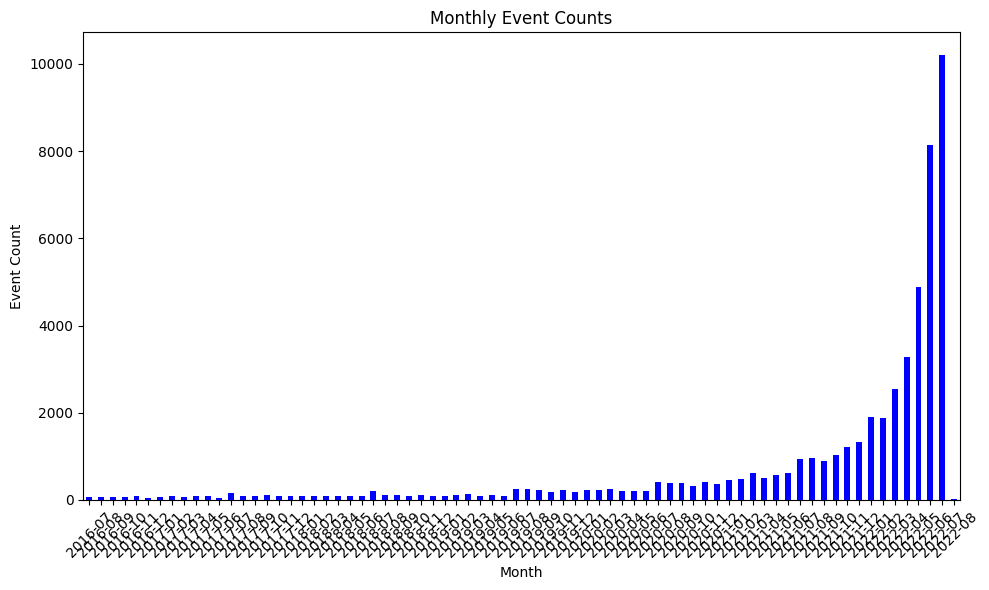

In [14]:
# event_time 열에서 월만 추출하여 새로운 열 추가
grouped['event_month'] = grouped['event_time'].dt.to_period('M')

# 월별 이벤트 개수 계산
event_counts_by_month = grouped['event_month'].value_counts().sort_index()

# 그래프 그리기
plt.figure(figsize=(10, 6))
event_counts_by_month.plot(kind='bar', color='blue')
plt.title('Monthly Event Counts')
plt.xlabel('Month')
plt.ylabel('Event Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [15]:
exi = grouped.merge(cus, on='customer_id', how='inner')

In [16]:
exi['first_join_date'] = pd.to_datetime(exi['first_join_date']).dt.date
exi['event_time_date'] = pd.to_datetime(exi['event_time']).dt.date
exi['used_dates'] = exi['event_time_date'] - exi['first_join_date']


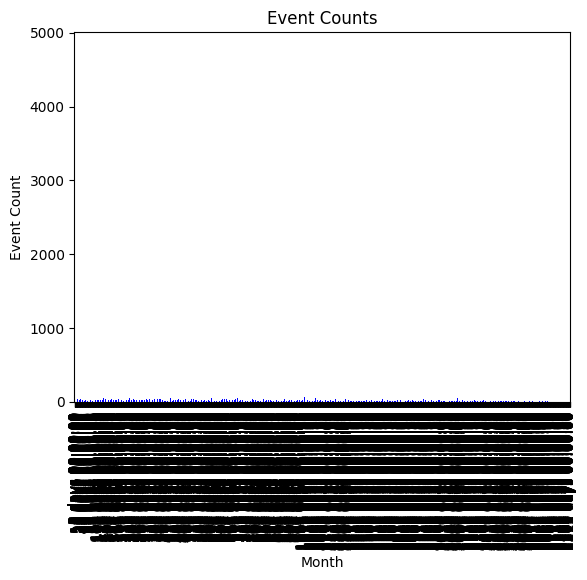

In [17]:
# 월별 이벤트 개수 계산
event_counts_by_used_dates = exi['used_dates'].value_counts().sort_index()

# 그래프 그리기
event_counts_by_used_dates.plot(kind='bar', color='blue')
plt.title('Event Counts')
plt.xlabel('Month')
plt.ylabel('Event Count')
plt.show()

# 프로모션 코드 사용률 확인

In [18]:
promo = tra[['booking_id', 'payment_status', 'promo_code', 'created_at']]
promo = promo[promo['payment_status'] == 'Success']
promo.fillna('NO_Promo', inplace = True)
# 'booking_id'를 기준으로 그룹화하고, 'promo_code'는 ','로 연결하여 합치기
grouped_promo = promo.groupby('booking_id', as_index=False).agg({
    'payment_status': 'first',
    'created_at': 'first',
    'promo_code': lambda x: x.unique()[0] if len(x.unique()) == 1 else ','.join(x.dropna())
})

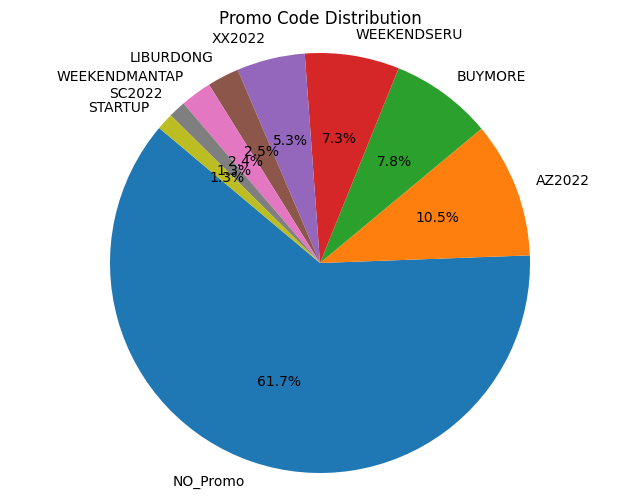

In [19]:
promo_counts = grouped_promo['promo_code'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(promo_counts, labels=promo_counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Promo Code Distribution")
plt.show()

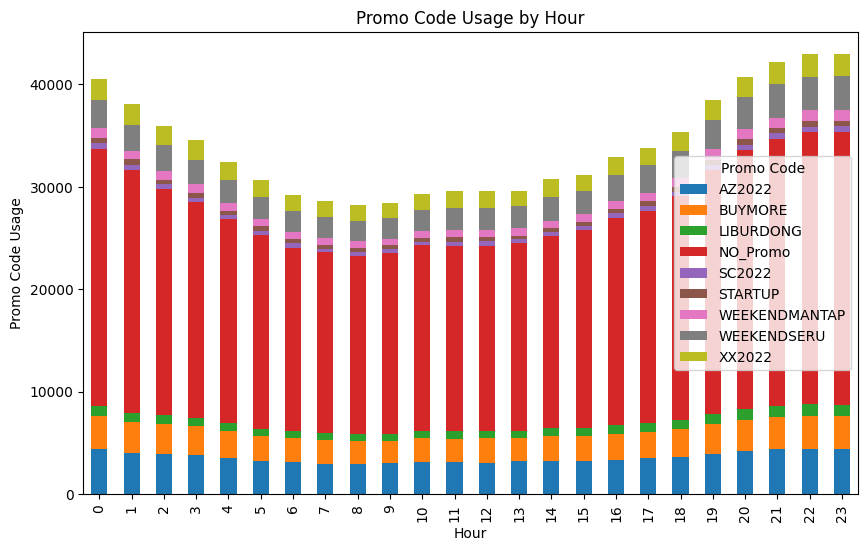

In [20]:
# 'created_at' 열을 datetime 형식으로 변환
grouped_promo['created_at'] = pd.to_datetime(grouped_promo['created_at'])

# 'created_at' 열에서 시간대 정보 추출
grouped_promo['hour'] = grouped_promo['created_at'].dt.hour

# 시간대별 프로모코드 사용률 계산
promo_usage_by_hour = grouped_promo.pivot_table(index='hour', columns='promo_code', values='booking_id', aggfunc='count', fill_value=0)

# 히스토그램 그리기
promo_usage_by_hour.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Hour')
plt.ylabel('Promo Code Usage')
plt.title('Promo Code Usage by Hour')
plt.legend(title='Promo Code')
plt.show()

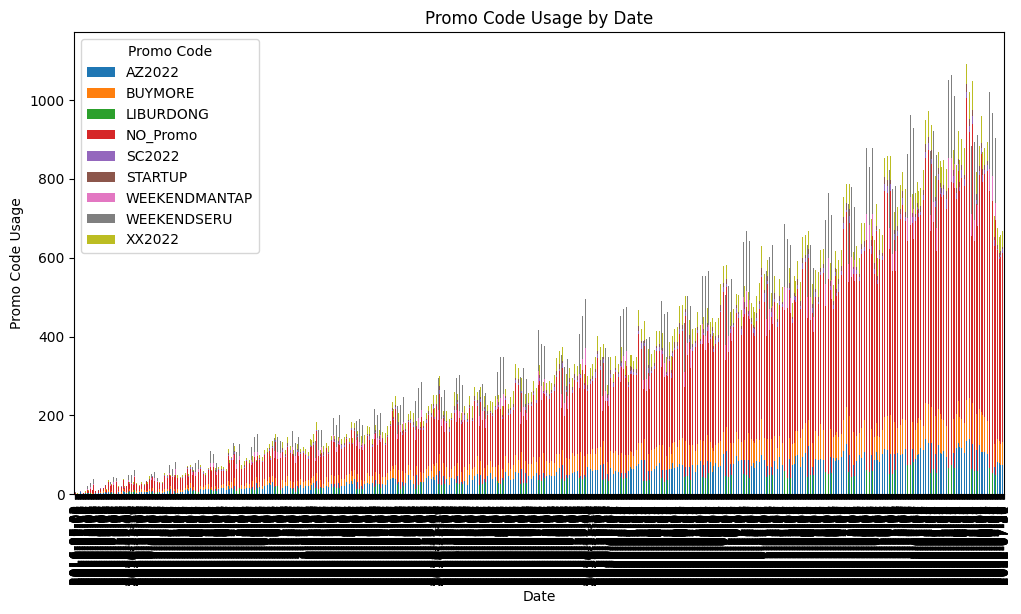

In [21]:
# 'created_at' 열에서 날짜 정보 추출
grouped_promo['date'] = grouped_promo['created_at'].dt.date

# 날짜별 프로모코드 사용률 계산
promo_usage_by_date = grouped_promo.pivot_table(index='date', columns='promo_code', values='booking_id', aggfunc='count', fill_value=0)

# 히스토그램 그리기
promo_usage_by_date.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.xlabel('Date')
plt.ylabel('Promo Code Usage')
plt.title('Promo Code Usage by Date')
plt.legend(title='Promo Code')
plt.show()

C:\Users\MRHN\AppData\Local\Temp\ipykernel_8424\1356512286.py:4: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  promo_rate['month'] = grouped_promo['created_at'].dt.to_period('M')
C:\Users\MRHN\AppData\Local\Temp\ipykernel_8424\1356512286.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  promo_rate['month'] = grouped_promo['created_at'].dt.to_period('M')


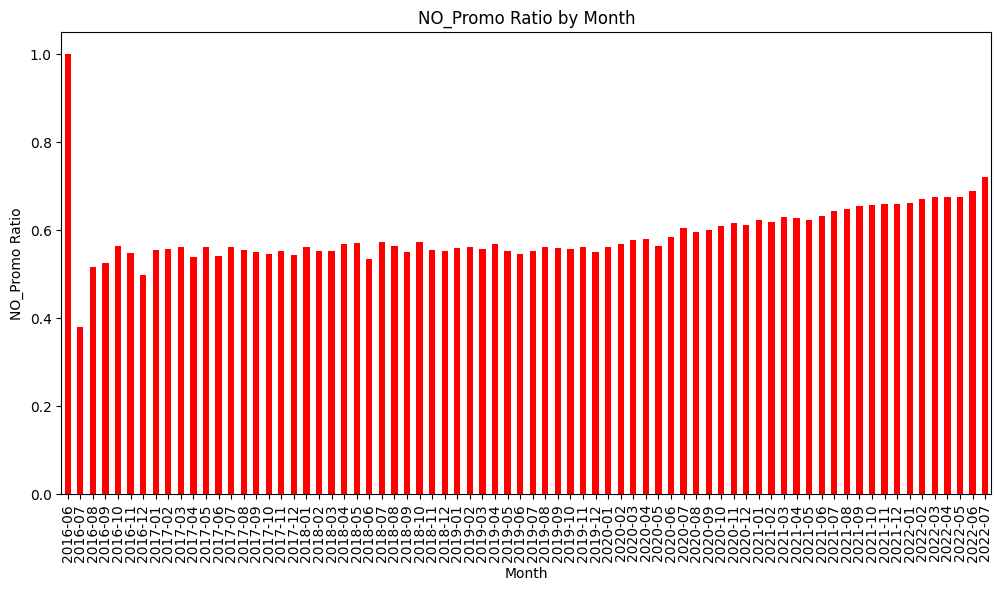

In [22]:
promo_rate = grouped_promo[['promo_code', 'date']]

# 'date' 열에서 월 정보 추출
promo_rate['month'] = grouped_promo['created_at'].dt.to_period('M')

# NO_Promo인 비율 계산
no_promo_counts = promo_rate[promo_rate['promo_code'] == 'NO_Promo'].groupby('month').size()
total_counts = promo_rate.groupby('month').size()
no_promo_ratio = no_promo_counts / total_counts

# 바 그래프로 표현
plt.figure(figsize=(12, 6))
no_promo_ratio.plot(kind='bar', color='red')
plt.xlabel('Month')
plt.ylabel('NO_Promo Ratio')
plt.title('NO_Promo Ratio by Month')
plt.show()

In [23]:
promo_rate['promo_code'].unique()

array(['NO_Promo', 'AZ2022', 'WEEKENDSERU', 'WEEKENDMANTAP', 'LIBURDONG',
       'XX2022', 'BUYMORE', 'STARTUP', 'SC2022'], dtype=object)

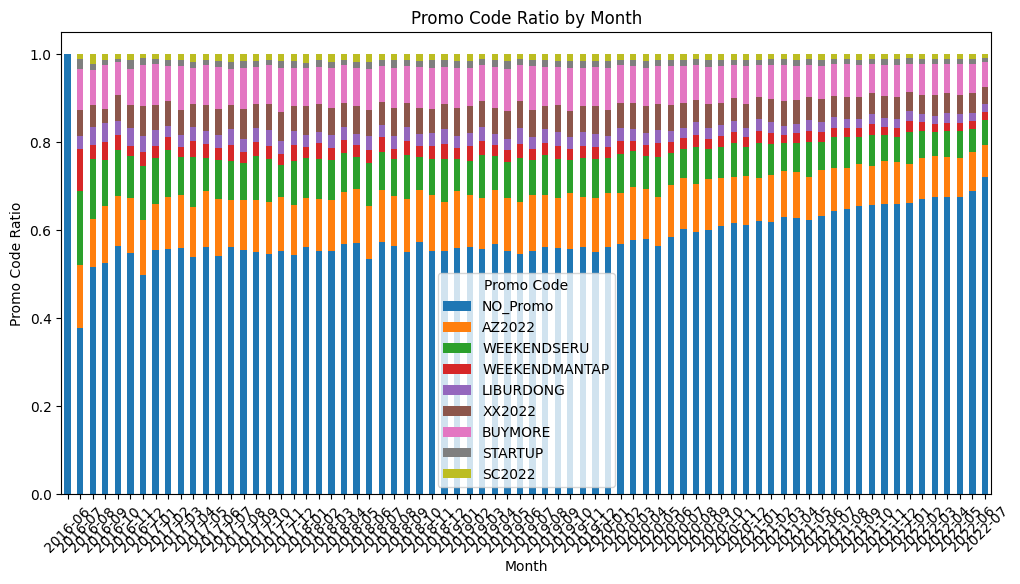

In [24]:
# 프로모션 코드 어레이
promo_codes = ['NO_Promo', 'AZ2022', 'WEEKENDSERU', 'WEEKENDMANTAP', 'LIBURDONG', 'XX2022', 'BUYMORE', 'STARTUP', 'SC2022']

# 프로모션 코드별 월별 비율 계산
promo_ratios = {}
for code in promo_codes:
    code_counts = promo_rate[promo_rate['promo_code'] == code].groupby('month').size()
    total_counts = promo_rate.groupby('month').size()
    promo_ratios[code] = code_counts / total_counts

# 데이터프레임으로 변환
promo_ratio_df = pd.DataFrame(promo_ratios)
promo_ratio_df = promo_ratio_df.fillna(0)  # NaN 값을 0으로 채우기

# 월별 스택된 바 그래프 생성
promo_ratio_df.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.xlabel('Month')
plt.ylabel('Promo Code Ratio')
plt.title('Promo Code Ratio by Month')
plt.xticks(rotation=45)
plt.legend(title='Promo Code')
plt.show()

# 고객 구매량 분포

In [25]:
customer_purchase = tra.groupby('customer_id')['quantity'].sum().reset_index()

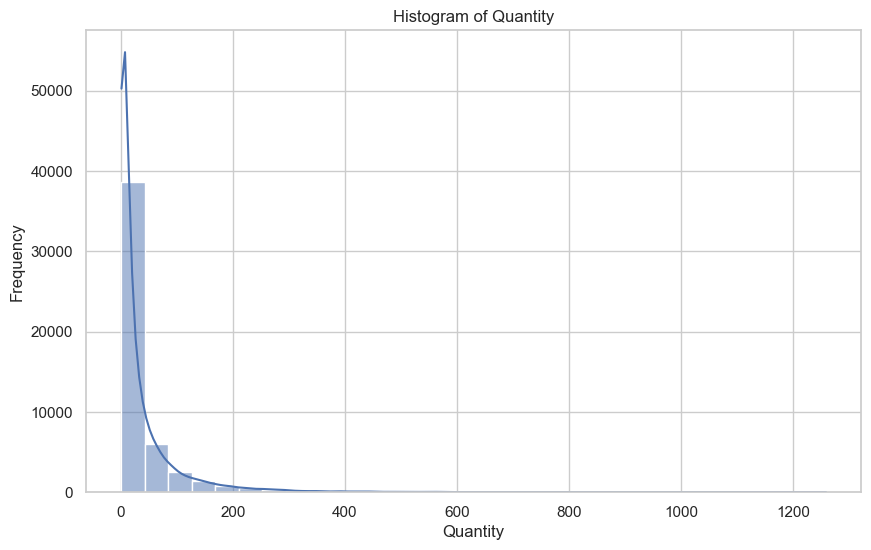

In [26]:
# 시각화를 위한 설정
sns.set(style="whitegrid")

# 히스토그램 그리기
plt.figure(figsize=(10, 6))
sns.histplot(data=customer_purchase, x="quantity", bins=30, kde=True)
plt.title("Histogram of Quantity")
plt.xlabel("Quantity")
plt.ylabel("Frequency")
plt.show()

In [27]:
# 정규성 검정 수행
statistic, p_value = shapiro(customer_purchase['quantity'])

# 결과 출력
print("Shapiro-Wilk Test")
print("Statistic:", statistic)
print("p-value:", p_value)

alpha = 0.05
if p_value > alpha:
    print("Sample looks Gaussian (fail to reject H0)")
else:
    print("Sample does not look Gaussian (reject H0)")

Shapiro-Wilk Test
Statistic: 0.5492167472839355
p-value: 0.0
Sample does not look Gaussian (reject H0)


C:\Users\MRHN\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [28]:
customer_purchase.quantity.describe()

count    50705.000000
mean        36.498846
std         65.676967
min          1.000000
25%          3.000000
50%         12.000000
75%         40.000000
max       1259.000000
Name: quantity, dtype: float64

In [29]:
value_counts = customer_purchase.quantity.value_counts().reset_index()

In [30]:
value_counts

,quantity,count
0,1,7030
1,2,3757
2,3,2689
3,4,2194
4,5,1783
...,...,...
574,548,1
575,807,1
576,535,1
577,844,1


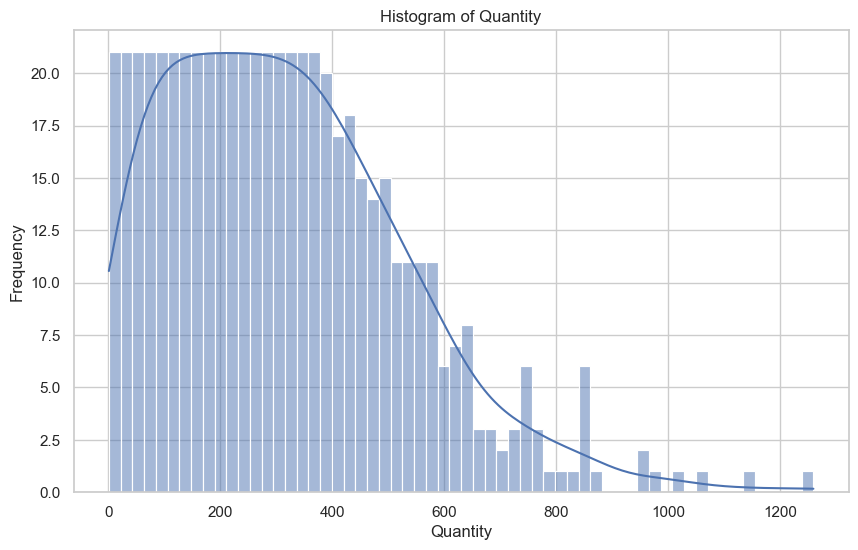

In [31]:
# 히스토그램 그리기
plt.figure(figsize=(10, 6))
sns.histplot(data=value_counts, x="quantity", bins=60, kde=True)
plt.title("Histogram of Quantity")
plt.xlabel("Quantity")
plt.ylabel("Frequency")
plt.show()

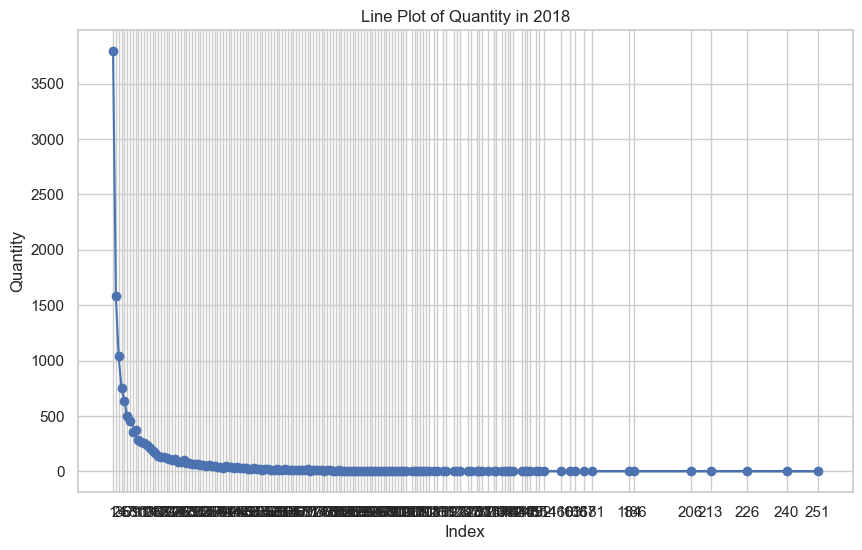

In [32]:
# created_at 열을 datetime 형식으로 변환
tra['created_at'] = pd.to_datetime(tra['created_at'])

# 2018로 필터링
tra_2018 = tra[tra['created_at'].dt.year == 2018]
tra_2018 = tra_2018.groupby('customer_id')['quantity'].sum().reset_index()
value_counts_2018 = tra_2018.quantity.value_counts().reset_index()

# 꺾은선 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(value_counts_2018['quantity'], value_counts_2018['count'], marker='o')
plt.title("Line Plot of Quantity in 2018")
plt.xlabel("Index")
plt.ylabel("Quantity")
plt.xticks(value_counts_2018['quantity'])
plt.grid(True)
plt.show()

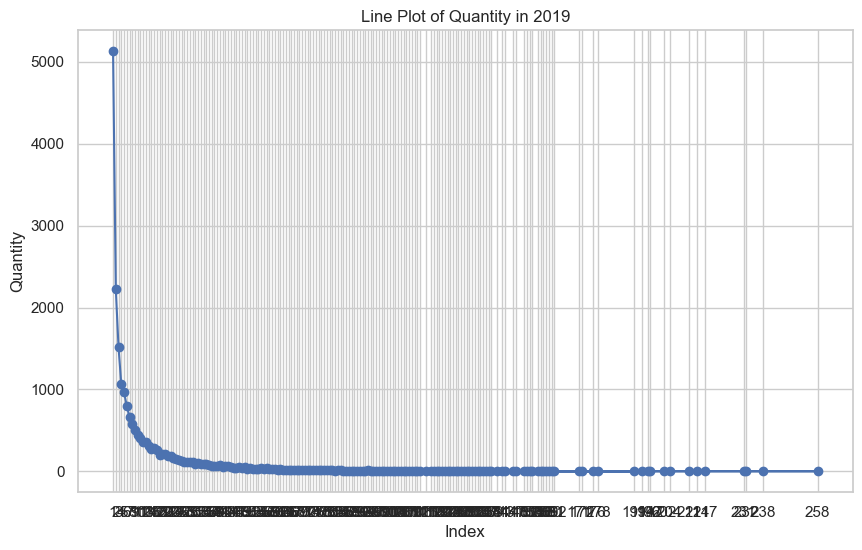

In [33]:
# 2019로 필터링
tra_2019 = tra[tra['created_at'].dt.year == 2019]
tra_2019 = tra_2019.groupby('customer_id')['quantity'].sum().reset_index()
value_counts_2019 = tra_2019.quantity.value_counts().reset_index()

# 꺾은선 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(value_counts_2019['quantity'], value_counts_2019['count'], marker='o')
plt.title("Line Plot of Quantity in 2019")
plt.xlabel("Index")
plt.ylabel("Quantity")
plt.xticks(value_counts_2019['quantity'])
plt.grid(True)
plt.show()

In [34]:
# tra 데이터프레임에서 2020년 데이터 필터링
tra_2020 = tra[tra['created_at'].dt.year == 2020]
tra_2020 = tra_2020.groupby('customer_id')['quantity'].sum().reset_index()
value_counts_2020 = tra_2020.quantity.value_counts().reset_index()

# tra 데이터프레임에서 2021년 데이터 필터링
tra_2021 = tra[tra['created_at'].dt.year == 2021]
tra_2021 = tra_2021.groupby('customer_id')['quantity'].sum().reset_index()
value_counts_2021 = tra_2021.quantity.value_counts().reset_index()

# tra 데이터프레임에서 2022년 데이터 필터링
tra_2022 = tra[tra['created_at'].dt.year == 2022]
tra_2022 = tra_2022.groupby('customer_id')['quantity'].sum().reset_index()
value_counts_2022 = tra_2022.quantity.value_counts().reset_index()

In [35]:
value_counts_2018

,quantity,count
0,1,3792
1,2,1579
2,3,1037
3,4,752
4,5,634
...,...,...
146,89,1
147,151,1
148,94,1
149,128,1


In [36]:
value_counts_2019

,quantity,count
0,1,5129
1,2,2225
2,3,1513
3,4,1065
4,5,965
...,...,...
165,178,1
166,139,1
167,154,1
168,141,1


In [37]:
value_counts_2020

,quantity,count
0,1,6210
1,2,3104
2,3,2046
3,4,1617
4,5,1280
...,...,...
176,157,1
177,230,1
178,178,1
179,210,1


In [38]:
value_counts_2021

,quantity,count
0,1,6395
1,2,3976
2,3,2633
3,4,2058
4,5,1687
...,...,...
205,231,1
206,173,1
207,209,1
208,213,1


In [39]:
value_counts_2022

,quantity,count
0,1,6072
1,2,3357
2,3,2388
3,4,2000
4,5,1601
...,...,...
159,119,1
160,162,1
161,315,1
162,159,1


In [40]:
# 2020년, 2021년, 2022년 value_counts 데이터프레임을 리스트로 묶음
value_counts_list = [value_counts_2022, value_counts_2021, value_counts_2020, value_counts_2019, value_counts_2018]

# 리스트에 있는 데이터프레임을 순차적으로 merge
value_counts_merged = value_counts_list[0]
for i, df in enumerate(value_counts_list[1:], start=1):
    # 열 이름에 접미사 추가
    df.columns = ['quantity', f'{df.columns[1]}_{i}']
    value_counts_merged = value_counts_merged.merge(df, on='quantity', how='outer')

value_counts_merged.fillna(0, inplace = True)

# 열 이름 변경
value_counts_merged.columns = ['quantity', '2022', '2021', '2020', '2019', '2018']

In [41]:
# 각 년도의 총 quantity 합계 계산
total_2022 = value_counts_merged['2022'].sum()
total_2021 = value_counts_merged['2021'].sum()
total_2020 = value_counts_merged['2020'].sum()
total_2019 = value_counts_merged['2019'].sum()
total_2018 = value_counts_merged['2018'].sum()

# 비율 계산 및 기존 열 대체
value_counts_merged_ratio = value_counts_merged
value_counts_merged_ratio['2022'] = value_counts_merged_ratio['2022'] / total_2022
value_counts_merged_ratio['2021'] = value_counts_merged_ratio['2021'] / total_2021
value_counts_merged_ratio['2020'] = value_counts_merged_ratio['2020'] / total_2020
value_counts_merged_ratio['2019'] = value_counts_merged_ratio['2019'] / total_2019
value_counts_merged_ratio['2018'] = value_counts_merged_ratio['2018'] / total_2018

# 열 이름 변경
value_counts_merged_ratio.columns = ['quantity', '2022_ratio', '2021_ratio', '2020_ratio', '2019_ratio', '2018_ratio']

In [42]:
value_counts_merged_ratio

,quantity,2022_ratio,2021_ratio,2020_ratio,2019_ratio,2018_ratio
0,1,0.184964,0.175124,0.220494,0.250795,0.272884
1,2,0.102260,0.108881,0.110212,0.108797,0.113630
2,3,0.072743,0.072103,0.072646,0.073982,0.074626
3,4,0.060924,0.056357,0.057414,0.052076,0.054116
4,5,0.048769,0.046198,0.045448,0.047186,0.045625
...,...,...,...,...,...,...
229,194,0.000000,0.000000,0.000000,0.000049,0.000000
230,232,0.000000,0.000000,0.000000,0.000049,0.000000
231,258,0.000000,0.000000,0.000000,0.000049,0.000000
232,240,0.000000,0.000000,0.000000,0.000000,0.000072


프로모 이용률
=> 신규 고객의 프로모 이용률이 더 적은지
=> 팬데믹 이후에 프로모 비율이 낮아지는 중

In [43]:
# 고객정보와 거래량 아우터 조인
cusxtra = cus.merge(tra, on='customer_id', how='outer')

In [44]:
cusxtra.columns

Index(['customer_id', 'first_name', 'last_name', 'username', 'email', 'gender',
       'birthdate', 'device_type', 'device_id', 'device_version',
       'home_location_lat', 'home_location_long', 'home_location',
       'home_country', 'first_join_date', 'created_at', 'booking_id',
       'session_id', 'payment_method', 'payment_status', 'promo_amount',
       'promo_code', 'shipment_fee', 'shipment_date_limit',
       'shipment_location_lat', 'shipment_location_long', 'total_amount',
       'product_id', 'quantity', 'item_price'],
      dtype='object')

In [45]:
# 필요한 콜럼만 필터링
new_cus_promo = cusxtra[['first_join_date', 'promo_amount']]

# 구매기록이 없는 고객 제거
new_cus_promo.dropna(inplace=True)

# first_join_date 열을 월 형식으로 변환
new_cus_promo['first_join_date'] = pd.to_datetime(new_cus_promo['first_join_date'])
new_cus_promo['first_join_date'] = new_cus_promo['first_join_date'].dt.to_period('M')

# promo_amount가 0이 아닌 경우 값을 1로 변경
new_cus_promo['promo_amount'] = new_cus_promo['promo_amount'].apply(lambda x: 1 if x != 0 else x)

# 날짜별로 그룹화하여 1과 0의 비율 계산
new_cus_promo_ratio = new_cus_promo.groupby('first_join_date')['promo_amount'].value_counts(normalize=True).unstack().fillna(0).reset_index()


C:\Users\MRHN\AppData\Local\Temp\ipykernel_8424\1591402784.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_cus_promo.dropna(inplace=True)
C:\Users\MRHN\AppData\Local\Temp\ipykernel_8424\1591402784.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_cus_promo['first_join_date'] = pd.to_datetime(new_cus_promo['first_join_date'])
C:\Users\MRHN\AppData\Local\Temp\ipykernel_8424\1591402784.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveat

In [46]:
new_cus_promo_ratio

promo_amount,first_join_date,0.0,1.0
0,2016-06,1.000000,0.000000
1,2016-07,0.345377,0.654623
2,2016-08,0.582063,0.417937
3,2016-09,0.577547,0.422453
4,2016-10,0.583221,0.416779
...,...,...,...
69,2022-03,0.759035,0.240965
70,2022-04,0.771254,0.228746
71,2022-05,0.306122,0.693878
72,2022-06,0.770096,0.229904


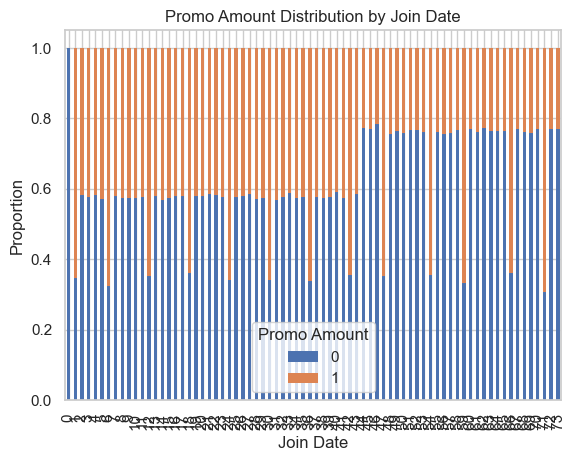

In [47]:
# 막대 그래프 그리기
new_cus_promo_ratio.plot(kind='bar', stacked=True, linewidth=0.01)

# 그래프에 제목과 축 레이블 추가
plt.title('Promo Amount Distribution by Join Date')
plt.xlabel('Join Date')
plt.ylabel('Proportion')

# 그래프 표시
plt.legend(title='Promo Amount', labels=['0', '1'])
plt.show()

In [48]:
new_cus_promo_ratio[new_cus_promo_ratio[0.0] < 0.4]

promo_amount,first_join_date,0.0,1.0
1,2016-07,0.345377,0.654623
6,2016-12,0.324228,0.675772
12,2017-06,0.351490,0.648510
18,2017-12,0.360781,0.639219
24,2018-06,0.340456,0.659544
30,2018-12,0.340458,0.659542
36,2019-06,0.339172,0.660828
42,2019-12,0.356245,0.643755
47,2020-05,0.352861,0.647139
54,2020-12,0.355543,0.644457


In [49]:
new_cus_promo.first_join_date.unique().median()

Period('2019-06', 'M')

In [50]:
new_cus_promo_ratio

promo_amount,first_join_date,0.0,1.0
0,2016-06,1.000000,0.000000
1,2016-07,0.345377,0.654623
2,2016-08,0.582063,0.417937
3,2016-09,0.577547,0.422453
4,2016-10,0.583221,0.416779
...,...,...,...
69,2022-03,0.759035,0.240965
70,2022-04,0.771254,0.228746
71,2022-05,0.306122,0.693878
72,2022-06,0.770096,0.229904


In [51]:
from scipy.stats import mannwhitneyu

# 가입일에 따른 프로모 양의 리스트 생성
early_promo = new_cus_promo_ratio[new_cus_promo_ratio['first_join_date'] == '2019-06'][1.0]
later_promo = new_cus_promo_ratio[new_cus_promo_ratio['first_join_date'] != '2019-06'][1.0]

# Mann-Whitney U 검정 실행
statistic, p_value = mannwhitneyu(early_promo, later_promo, alternative='two-sided')

# 결과 출력
print("Mann-Whitney U 검정 결과:")
print("통계량 (U):", statistic)
print("p-value:", p_value)

alpha = 0.05
if p_value < alpha:
    print("귀무가설을 기각합니다.")
    print("프로모션을 사용한 그룹과 사용하지 않은 그룹 간에 가입일에 따른 프로모션 사용 비율의 중앙값은 통계적으로 유의미하게 다릅니다.")
else:
    print("귀무가설을 채택합니다.")
    print("프로모션을 사용한 그룹과 사용하지 않은 그룹 간에 가입일에 따른 프로모션 사용 비율의 중앙값은 통계적으로 유의미하지 다르지 않습니다.")

Mann-Whitney U 검정 결과:
통계량 (U): 70.0
p-value: 0.10810810810810811
귀무가설을 채택합니다.
프로모션을 사용한 그룹과 사용하지 않은 그룹 간에 가입일에 따른 프로모션 사용 비율의 중앙값은 통계적으로 유의미하지 다르지 않습니다.


In [52]:
no_promo_ratio_ = no_promo_ratio.reset_index()

from scipy.stats import spearmanr

# 날짜와 프로모션 사용률 데이터
dates = no_promo_ratio_['month']
usage_ratios = no_promo_ratio_[0]

# Spearman 상관계수 검정 실행
correlation, p_value = spearmanr(dates, usage_ratios)

alpha = 0.05

print("Spearman 상관계수 검정 결과:")
print("상관계수:", correlation)
print("p-value:", p_value)

if p_value < alpha:
    print("귀무가설을 기각합니다.")
    print("날짜와 프로모션 사용률은 관계가 있다.")
else:
    print("귀무가설을 채택합니다.")
    print("날짜와 프로모션 사용률은 관계가 없다.")

Spearman 상관계수 검정 결과:
상관계수: 0.786182895223991
p-value: 1.0557178799339185e-16
귀무가설을 기각합니다.
날짜와 프로모션 사용률은 관계가 있다.


In [53]:
# 필요한 콜럼만 필터링
Thr_mon = cusxtra[['first_join_date', 'promo_amount']]

# 구매기록이 없는 고객 제거
Thr_mon.dropna(inplace=True)

# first_join_date 열을 월 형식으로 변환
Thr_mon['first_join_date'] = pd.to_datetime(Thr_mon['first_join_date'])

# 날짜 범위 설정
start_date = pd.Timestamp('2016-06-30')
end_date = pd.Timestamp('2022-07-01')

# 날짜 범위에 해당하는 데이터 선택
Thr_mon = Thr_mon[(Thr_mon['first_join_date'] > start_date) & (Thr_mon['first_join_date'] < end_date)]
Thr_mon['first_join_date'] = Thr_mon['first_join_date'].dt.to_period('M')

# 연도별로 3달 단위로 묶어서 표현
def custom_quarters(date):
    year = date.year
    quarter = (date.month - 1) // 3 + 1
    return f"{year} {quarter}Q"

Thr_mon['quarter'] = Thr_mon['first_join_date'].apply(custom_quarters)

# promo_amount가 0이 아닌 경우 값을 1로 변경
Thr_mon['promo_amount'] = Thr_mon['promo_amount'].apply(lambda x: 1 if x != 0 else x)

# 날짜별로 그룹화하여 1과 0의 비율 계산
Thr_mon_ratio = Thr_mon.groupby('quarter')['promo_amount'].value_counts(normalize=True).unstack().fillna(0).reset_index()

C:\Users\MRHN\AppData\Local\Temp\ipykernel_8424\4144358838.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Thr_mon.dropna(inplace=True)
C:\Users\MRHN\AppData\Local\Temp\ipykernel_8424\4144358838.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Thr_mon['first_join_date'] = pd.to_datetime(Thr_mon['first_join_date'])


In [54]:
Thr_mon

,first_join_date,promo_amount,quarter
2,2020-08,1.0,2020 3Q
3,2020-08,1.0,2020 3Q
4,2020-08,0.0,2020 3Q
5,2020-08,0.0,2020 3Q
6,2020-08,0.0,2020 3Q
...,...,...,...
1303875,2021-07,0.0,2021 3Q
1303876,2021-07,1.0,2021 3Q
1303877,2021-07,0.0,2021 3Q
1303878,2021-07,0.0,2021 3Q


In [55]:
from scipy.stats import f_oneway

#quarter 정상화
Thr_mon['quarter'] = Thr_mon['quarter'].str[-2]
Thr_mon['quarter'] = Thr_mon['quarter'].astype(int)
Thr_mon['year'] = Thr_mon['first_join_date'].dt.year

# 연도와 분기를 4분기로 묶어서 합산
Thr_mon['quarter_group'] = (Thr_mon['quarter'] - 1) // 3 + 1
quarterly_grouped = Thr_mon.groupby(['year', 'quarter_group'])['promo_amount'].sum().reset_index()

# 분산 분석 (ANOVA) 수행
result = f_oneway(*[group['promo_amount'] for name, group in quarterly_grouped.groupby('year')])

# 결과 출력
print("분산 분석 결과:")
print("F-통계량:", result.statistic)
print("p-값:", result.pvalue)

# p-값을 이용하여 검정 결과 판단
alpha = 0.05
if result.pvalue < alpha:
    print("귀무가설 기각: 통계적으로 유의미한 차이가 있습니다.")
else:
    print("귀무가설 채택: 통계적으로 유의미한 차이가 없습니다.")

분산 분석 결과:
F-통계량: 0.5314974223443013
p-값: 0.7694019509600278
귀무가설 채택: 통계적으로 유의미한 차이가 없습니다.


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


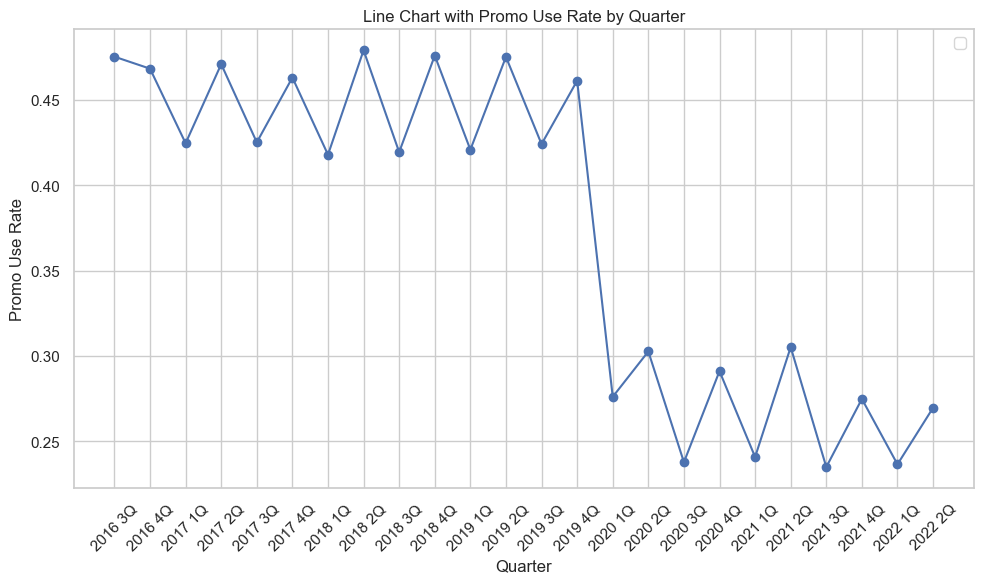

In [56]:
# 꺾은선 그래프 그리기
# 꺾은선 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(Thr_mon_ratio['quarter'], Thr_mon_ratio[1], marker='o')
plt.xlabel('Quarter')
plt.ylabel('Promo Use Rate')
plt.title('Line Chart with Promo Use Rate by Quarter')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()

# 그래프 표시
plt.show()

# 고객 등급 클러스터링

In [57]:
clust_tra = tra[['customer_id', 'total_amount']]

# 고객당 누적 구매량 계산
clust_tra_ras = clust_tra.groupby('customer_id')['total_amount'].sum().reset_index()
clust_tra_fin = clust_tra_ras.copy()

# 클러스터링을 위해 표준화
scaler = StandardScaler()
clust_tra_fin[['total_amount']] = scaler.fit_transform(clust_tra_fin[['total_amount']])

C:\Users\MRHN\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\MRHN\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\MRHN\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set th

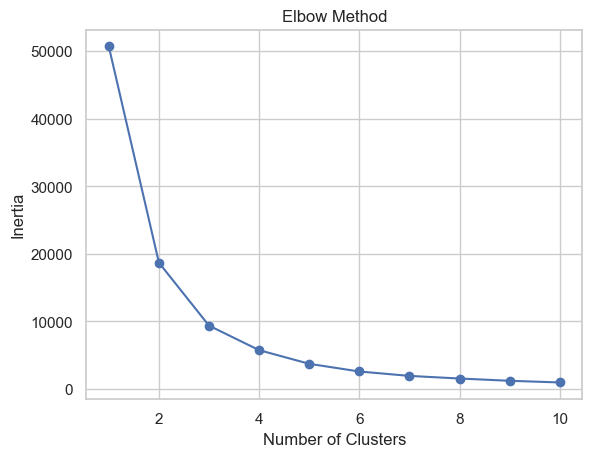

C:\Users\MRHN\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\MRHN\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\MRHN\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set th

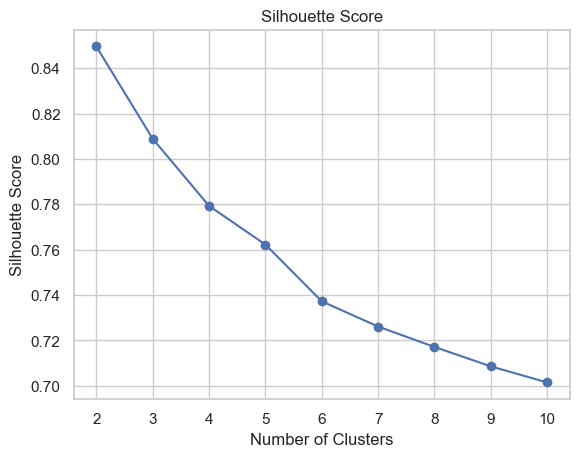

In [58]:
# 최적의 클러스터 개수 찾기 (엘보우 메서드)
inertia_values = []
for num_clusters in range(1, 11):
    kmeans = KMeans(n_clusters=num_clusters, random_state=0)
    kmeans.fit(clust_tra_fin[['total_amount']])
    inertia_values.append(kmeans.inertia_)

# 엘보우 메서드 시각화
plt.plot(range(1, 11), inertia_values, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

# 최적의 클러스터 개수 찾기 (실루엣 스코어)
silhouette_scores = []
for num_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=num_clusters, random_state=0)
    cluster_labels = kmeans.fit_predict(clust_tra_fin[['total_amount']])
    silhouette_scores.append(silhouette_score(clust_tra_fin[['total_amount']], cluster_labels))

# 실루엣 스코어 시각화
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Score')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [59]:
# K-means 클러스터링 수행
num_clusters = 6  # 원하는 클러스터 수 설정
kmeans = KMeans(n_clusters=num_clusters, random_state=0)
clust_tra_ras['cluster'] = kmeans.fit_predict(clust_tra_fin[['total_amount']])

C:\Users\MRHN\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [60]:
cluster_mapping = {
    2: '1st',
    4: '2nd',
    1: '3rd',
    5: '4th',
    3: '5th',
    0: '6th'
}

clust_tra_ras['cluster_category'] = clust_tra_ras['cluster'].map(cluster_mapping)

In [61]:
clust_tra_ras

,customer_id,total_amount,cluster,cluster_category
0,3,45842098,3,5th
1,8,4758601,0,6th
2,9,4113630,0,6th
3,11,197533,0,6th
4,15,6447246,0,6th
...,...,...,...,...
50700,99992,14033384,0,6th
50701,99995,58958135,3,5th
50702,99997,226461,0,6th
50703,99998,70563417,3,5th


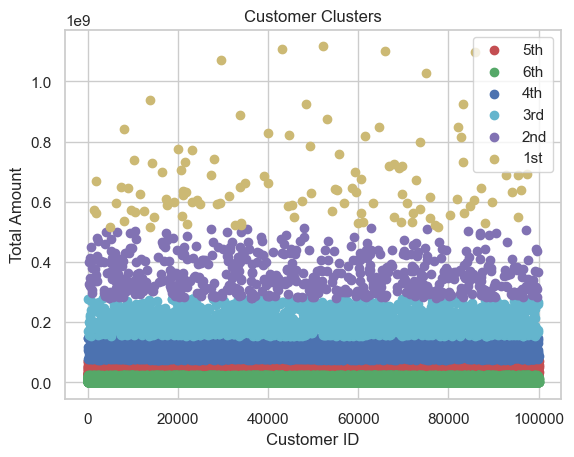

In [62]:
# 각 클러스터 별로 데이터 분리
clusters = clust_tra_ras['cluster_category'].unique()
cluster_data = [clust_tra_ras[clust_tra_ras['cluster_category'] == cluster] for cluster in clusters]

# 클러스터에 적용할 색상 리스트
colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k']

# 클러스터별 그래프 그리기
for cluster, data, color in zip(clusters, cluster_data, colors):
    plt.scatter(data['customer_id'], data['total_amount'], label=f'{cluster}', color=color)

plt.title('Customer Clusters')
plt.xlabel('Customer ID')
plt.ylabel('Total Amount')
plt.legend()
plt.show()

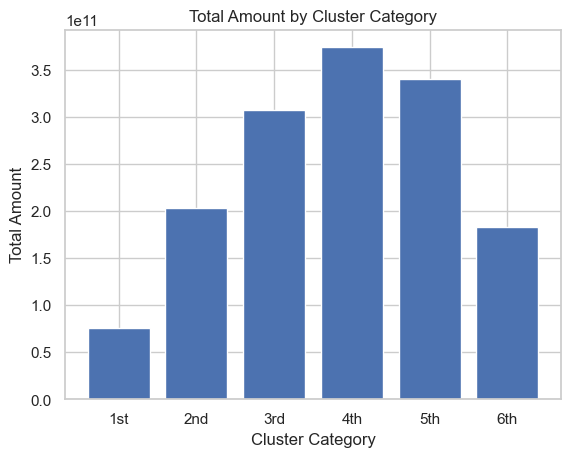

In [63]:
# 클러스터 카테고리별 total_amount 합산
cluster_amount = clust_tra_ras.groupby('cluster_category')['total_amount'].sum()

# 막대그래프 그리기
plt.bar(cluster_amount.index, cluster_amount.values)
plt.title('Total Amount by Cluster Category')
plt.xlabel('Cluster Category')
plt.ylabel('Total Amount')
plt.show()

In [64]:
for_tra_merge = clust_tra_ras[['customer_id', 'cluster_category']]
tra_clustermade = tra.merge(for_tra_merge, on='customer_id', how='outer')

In [65]:
tra_clustermade

,created_at,customer_id,booking_id,session_id,payment_method,payment_status,promo_amount,promo_code,shipment_fee,shipment_date_limit,shipment_location_lat,shipment_location_long,total_amount,product_id,quantity,item_price,cluster_category
0,2018-07-29 15:22:01.458193+00:00,5868,186e2bee-0637-4710-8981-50c2d737bc42,3abaa6ce-e320-4e51-9469-d9f3fa328e86,Debit Card,Success,1415,WEEKENDSERU,10000,2018-08-03T05:07:24.812676Z,-8.227893,111.969107,199832,54728,1,191247,6th
1,2018-07-30 12:40:22.365620+00:00,4774,caadb57b-e808-4f94-9e96-8a7d4c9898db,2ee5ead1-f13e-4759-92df-7ff48475e970,Credit Card,Success,0,NaN,10000,2018-08-03T01:29:03.415705Z,3.013470,107.802514,155526,16193,1,145526,5th
2,2018-09-15 11:51:17.365620+00:00,4774,6000fffb-9c1a-4f4a-9296-bc8f6b622b50,93325fb6-eb00-4268-bb0e-6471795a0ad0,OVO,Success,0,NaN,10000,2018-09-18T08:41:49.422380Z,-2.579428,115.743885,550696,53686,4,135174,5th
3,2018-11-01 11:23:48.365620+00:00,4774,f5e530a7-4350-4cd1-a3bc-525b5037bcab,bcad5a61-1b67-448d-8ff4-781d67bc56e4,Credit Card,Success,0,NaN,0,2018-11-05T17:42:27.954235Z,-3.602334,120.363824,271012,20228,1,271012,5th
4,2018-12-18 11:20:30.365620+00:00,4774,0efc0594-dbbf-4f9a-b0b0-a488cfddf8a2,df1042ab-13e6-4072-b9d2-64a81974c51a,Credit Card,Success,0,NaN,0,2018-12-23T17:24:07.361785Z,-3.602334,120.363824,198753,55220,1,198753,5th
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254580,2021-09-21 22:10:05.074873+00:00,25121,66f02fa4-c62e-497a-8b6e-be239009b50a,484eecde-9f4a-42de-a8df-7ce6668101f4,Debit Card,Failed,0,NaN,0,2021-09-27T00:43:40.992167Z,-6.869535,111.077145,226820,30642,2,113410,6th
1254581,2021-12-09 07:35:18.222046+00:00,34829,ccde6b83-ee42-4cce-b2cd-976574886eac,954e1211-4d45-4d0b-ba84-53e80119592c,OVO,Success,5010,AZ2022,10000,2021-12-12T07:52:44.803822Z,-8.677264,115.176947,359203,19394,1,354213,6th
1254582,2021-12-11 01:20:36.944593+00:00,99645,5bcd3434-1dc6-44bb-ae63-fd19714cbd6c,e6e6c108-abd0-49a2-b0a5-691117f9cfe1,Credit Card,Success,2181,WEEKENDSERU,5000,2021-12-12T13:28:22.848703Z,-6.185498,106.831093,1158159,13079,4,288835,6th
1254583,2019-12-18 11:01:09.623382+00:00,87319,af7f291a-b01b-4bfd-89a9-237b16368b15,bb6e5426-a3f3-426a-b99d-79173eaa234b,Credit Card,Success,4503,AZ2022,0,2019-12-23T22:56:46.831720Z,-7.155977,110.891858,184143,11312,1,188646,6th


In [66]:
# 필요한 콜럼만 필터링
cluster_category_filtered = tra_clustermade[['created_at', 'total_amount', 'cluster_category']]

# 'created_at' 열을 datetime 형식으로 변환
cluster_category_filtered['created_at'] = pd.to_datetime(cluster_category_filtered['created_at']).dt.to_period('M')

C:\Users\MRHN\AppData\Local\Temp\ipykernel_8424\1545625250.py:5: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  cluster_category_filtered['created_at'] = pd.to_datetime(cluster_category_filtered['created_at']).dt.to_period('M')
C:\Users\MRHN\AppData\Local\Temp\ipykernel_8424\1545625250.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_category_filtered['created_at'] = pd.to_datetime(cluster_category_filtered['created_at']).dt.to_period('M')


In [67]:
# 연도별로 3달 단위로 묶어서 표현
cluster_category_filtered['quarter'] = cluster_category_filtered['created_at'].apply(custom_quarters)

C:\Users\MRHN\AppData\Local\Temp\ipykernel_8424\424788589.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_category_filtered['quarter'] = cluster_category_filtered['created_at'].apply(custom_quarters)


In [68]:
cluster_category_filtered

,created_at,total_amount,cluster_category,quarter
0,2018-07,199832,6th,2018 3Q
1,2018-07,155526,5th,2018 3Q
2,2018-09,550696,5th,2018 3Q
3,2018-11,271012,5th,2018 4Q
4,2018-12,198753,5th,2018 4Q
...,...,...,...,...
1254580,2021-09,226820,6th,2021 3Q
1254581,2021-12,359203,6th,2021 4Q
1254582,2021-12,1158159,6th,2021 4Q
1254583,2019-12,184143,6th,2019 4Q


In [69]:
from scipy.stats import f_oneway

#quarter 정상화
cluster_category_filtered['quarter_'] = cluster_category_filtered['quarter'].str[-2]
cluster_category_filtered['quarter_'] = cluster_category_filtered['quarter_'].astype(int)
cluster_category_filtered['year'] = cluster_category_filtered['created_at'].dt.year

# 연도와 분기를 4분기로 묶어서 합산
cluster_category_filtered['quarter_group'] = (cluster_category_filtered['quarter_'] - 1) // 3 + 1
quarterly_grouped = cluster_category_filtered.groupby(['year', 'quarter_group'])['total_amount'].sum().reset_index()

# 분산 분석 (ANOVA) 수행
result = f_oneway(*[group['total_amount'] for name, group in quarterly_grouped.groupby('year')])

# 결과 출력
print("분산 분석 결과:")
print("F-통계량:", result.statistic)
print("p-값:", result.pvalue)

# p-값을 이용하여 검정 결과 판단
alpha = 0.05
if result.pvalue < alpha:
    print("귀무가설 기각: 통계적으로 유의미한 차이가 있습니다.")
else:
    print("귀무가설 채택: 통계적으로 유의미한 차이가 없습니다.")

C:\Users\MRHN\AppData\Local\Temp\ipykernel_8424\1792052992.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_category_filtered['quarter_'] = cluster_category_filtered['quarter'].str[-2]
C:\Users\MRHN\AppData\Local\Temp\ipykernel_8424\1792052992.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_category_filtered['quarter_'] = cluster_category_filtered['quarter_'].astype(int)
C:\Users\MRHN\AppData\Local\Temp\ipykernel_8424\1792052992.py:6: SettingWithCopyWarning: 
A value is trying to be s

분산 분석 결과:
F-통계량: 3.936609229770313
p-값: 0.05991137220126928
귀무가설 채택: 통계적으로 유의미한 차이가 없습니다.


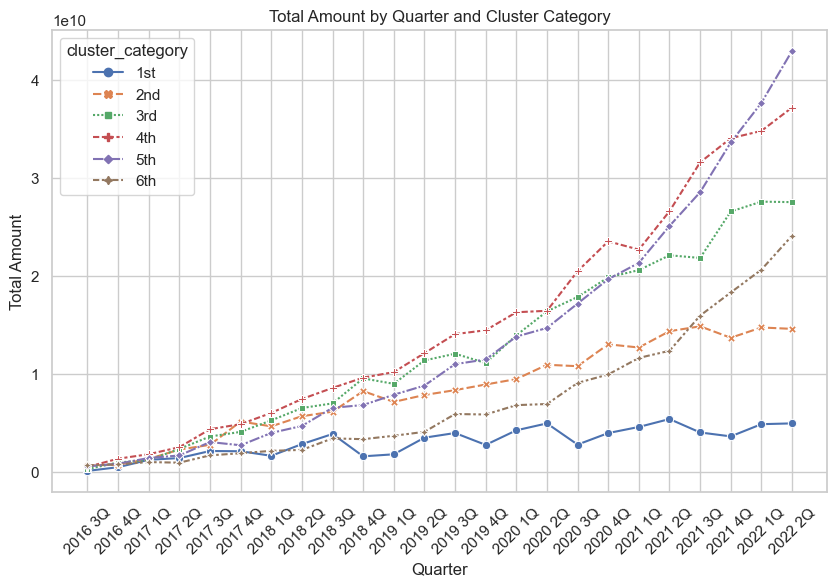

In [70]:
# 데이터프레임 정리
labels_to_drop = ['2016 2Q', '2022 3Q']
cluster_category_filtered = cluster_category_filtered[~cluster_category_filtered['quarter'].isin(labels_to_drop)]
cluster_category_filtered.reset_index(drop=True, inplace=True)
pivot_cluster_category_filtered = cluster_category_filtered.pivot_table(index='quarter', columns='cluster_category', values='total_amount', aggfunc='sum')

# seaborn으로 그래프 그리기
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.lineplot(data=pivot_cluster_category_filtered, markers=True)
plt.title("Total Amount by Quarter and Cluster Category")
plt.xlabel("Quarter")
plt.ylabel("Total Amount")
plt.xticks(rotation=45)
plt.show()

# 클릭 클러스터링

In [71]:
# 'event_name'이 'BOOKING'인 행의 'session_id'를 선택
target_session_ids = cl.loc[cl['event_name'] == 'BOOKING', 'session_id']

# 동일한 'session_id'를 가진 행들을 모두 제거
cl_filtered = cl[~cl['session_id'].isin(target_session_ids)]

In [72]:
cl_filtered_for_clust = cl_filtered[['session_id', 'event_name']]

In [73]:
pivot_cl_filtered_for_clust = cl_filtered_for_clust.groupby(['session_id', 'event_name']).size().unstack(fill_value=0)
pivot_cl_filtered_for_clust

event_name,ADD_TO_CART,CLICK,HOMEPAGE,ITEM_DETAIL,PROMO_PAGE,SCROLL,SEARCH
session_id,,,,,,,
00038f48-10a2-4752-bdcf-4d12b5731f6e,1,0,2,2,0,1,0
0004541a-fdf4-4c37-8bec-b1f8cc51bab1,0,0,1,1,0,0,1
00051df2-4589-43ec-9ef7-d5527ad793a5,5,4,2,3,0,3,1
0006800a-b81c-402a-9920-697a264ea1b2,3,0,1,0,0,0,0
0008886e-c7f6-4e77-94bb-aff22c6ee544,1,2,2,1,2,2,0
...,...,...,...,...,...,...,...
fff35539-ee60-4c93-9160-e44739a68f63,1,5,1,0,1,0,1
fff4e1e6-ca25-462d-8176-bbe692af30aa,1,0,2,0,0,0,0
fff55bcc-4d59-46e1-8e48-7c7f585121ce,1,3,1,1,1,1,0


C:\Users\MRHN\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\MRHN\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\MRHN\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set th

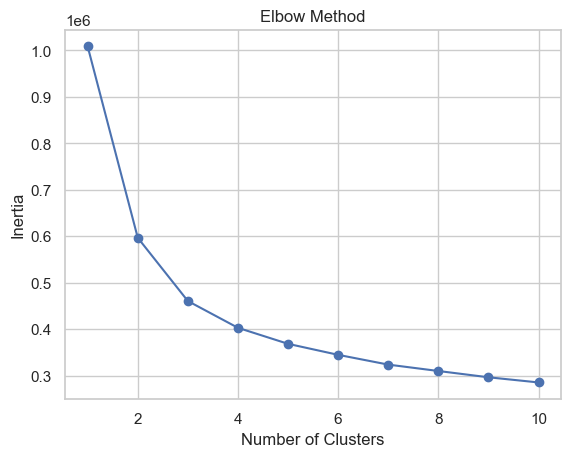

C:\Users\MRHN\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\MRHN\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\MRHN\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set th

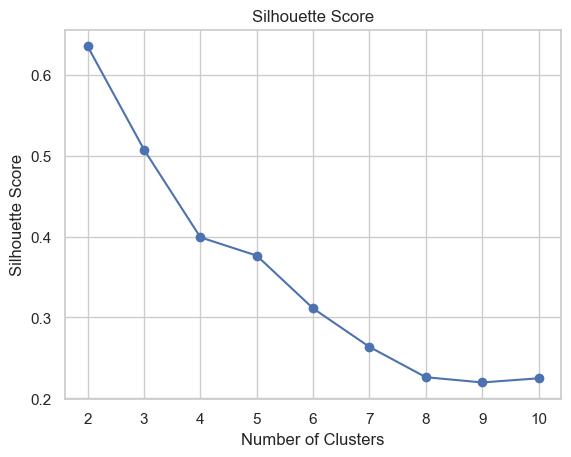

In [74]:
# 최적의 클러스터 개수 찾기 (엘보우 메서드)
inertia_values = []
for num_clusters in range(1, 11):
    kmeans = KMeans(n_clusters=num_clusters, random_state=0)
    kmeans.fit(pivot_cl_filtered_for_clust)
    inertia_values.append(kmeans.inertia_)

# 엘보우 메서드 시각화
plt.plot(range(1, 11), inertia_values, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

# 최적의 클러스터 개수 찾기 (실루엣 스코어)
silhouette_scores = []
for num_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=num_clusters, random_state=0)
    cluster_labels = kmeans.fit_predict(pivot_cl_filtered_for_clust)
    silhouette_scores.append(silhouette_score(pivot_cl_filtered_for_clust, cluster_labels))

# 실루엣 스코어 시각화
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Score')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

C:\Users\MRHN\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


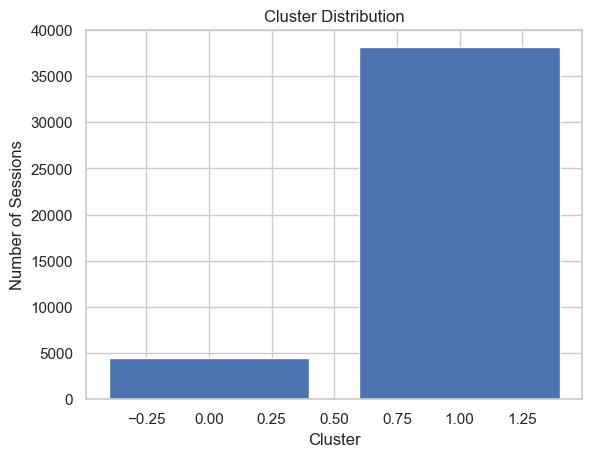

event_name,ADD_TO_CART,CLICK,HOMEPAGE,ITEM_DETAIL,PROMO_PAGE,SCROLL,SEARCH,cluster
session_id,,,,,,,,
00038f48-10a2-4752-bdcf-4d12b5731f6e,1,0,2,2,0,1,0,1
0004541a-fdf4-4c37-8bec-b1f8cc51bab1,0,0,1,1,0,0,1,1
00051df2-4589-43ec-9ef7-d5527ad793a5,5,4,2,3,0,3,1,1
0006800a-b81c-402a-9920-697a264ea1b2,3,0,1,0,0,0,0,1
0008886e-c7f6-4e77-94bb-aff22c6ee544,1,2,2,1,2,2,0,1
...,...,...,...,...,...,...,...,...
fff35539-ee60-4c93-9160-e44739a68f63,1,5,1,0,1,0,1,1
fff4e1e6-ca25-462d-8176-bbe692af30aa,1,0,2,0,0,0,0,1
fff55bcc-4d59-46e1-8e48-7c7f585121ce,1,3,1,1,1,1,0,1


In [75]:
# K-Means 클러스터링 수행
num_clusters = 2  # 원하는 클러스터 수 설정
kmeans = KMeans(n_clusters=num_clusters, random_state=0)
pivot_cl_filtered_for_clust['cluster'] = kmeans.fit_predict(pivot_cl_filtered_for_clust)

# 클러스터별 분포 시각화
cluster_counts = pivot_cl_filtered_for_clust['cluster'].value_counts()
plt.bar(cluster_counts.index, cluster_counts.values)
plt.xlabel('Cluster')
plt.ylabel('Number of Sessions')
plt.title('Cluster Distribution')
plt.show()

pivot_cl_filtered_for_clust

In [76]:
pivot_cl_filtered_for_clust_last = pivot_cl_filtered_for_clust.reset_index()[['session_id', 'cluster']]
cl_clustered = cl_filtered_for_clust.merge(pivot_cl_filtered_for_clust_last, on='session_id', how='outer')

In [77]:
# 클러스터별 데이터프레임 생성
cl_0_cluster = cl_clustered[cl_clustered['cluster'] == 0].event_name.value_counts().reset_index()
cl_1_cluster = cl_clustered[cl_clustered['cluster'] == 1].event_name.value_counts().reset_index()
cl_cluster_count = cl_0_cluster.merge(cl_1_cluster, on='event_name', how='outer')
cl_cluster_count.columns = ['event_name', '0_count', '1_count']

<Figure size 1000x600 with 0 Axes>

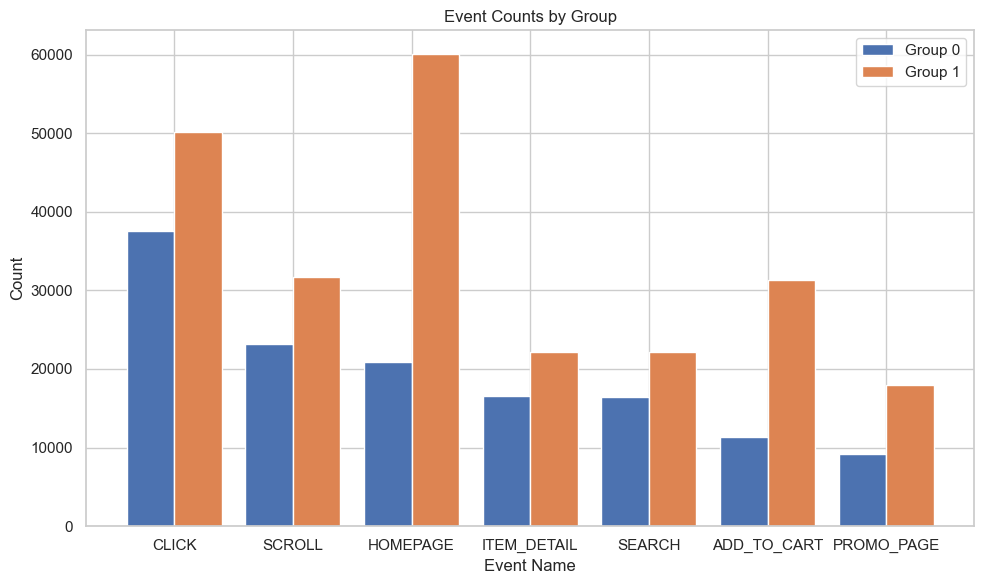

In [78]:
# 그래프 생성
plt.figure(figsize=(10, 6))

# 그래프 생성
plt.figure(figsize=(10, 6))

# 각 그룹에 대한 막대 그래프 생성
width = 0.4
ind = range(len(cl_cluster_count))
plt.bar(ind, cl_cluster_count['0_count'], width, label='Group 0')
plt.bar([i + width for i in ind], cl_cluster_count['1_count'], width, label='Group 1')

plt.xlabel('Event Name')
plt.ylabel('Count')
plt.title('Event Counts by Group')
plt.xticks([i + width/2 for i in ind], cl_cluster_count['event_name'])
plt.legend()
plt.tight_layout()

# 그래프 표시
plt.show()

In [79]:
cl_cluster_count

,event_name,0_count,1_count
0,CLICK,37602,50109
1,SCROLL,23206,31730
2,HOMEPAGE,20919,60063
3,ITEM_DETAIL,16498,22111
4,SEARCH,16489,22179
5,ADD_TO_CART,11276,31350
6,PROMO_PAGE,9144,17922


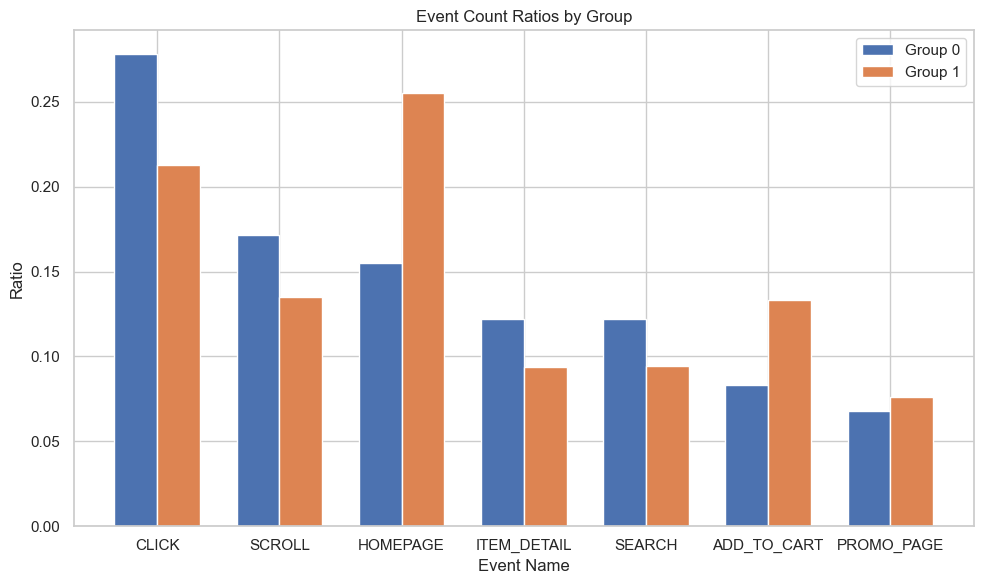

In [80]:
# 카운트를 비율로 변환
total_count_0 = cl_cluster_count['0_count'].sum()
total_count_1 = cl_cluster_count['1_count'].sum()

cl_cluster_count['0_ratio'] = cl_cluster_count['0_count'] / total_count_0
cl_cluster_count['1_ratio'] = cl_cluster_count['1_count'] / total_count_1

# 그래프 생성
plt.figure(figsize=(10, 6))

# 각 그룹에 대한 막대 그래프 생성
width = 0.35
ind = range(len(cl_cluster_count))
plt.bar(ind, cl_cluster_count['0_ratio'], width, label='Group 0')
plt.bar([i + width for i in ind], cl_cluster_count['1_ratio'], width, label='Group 1')

plt.xlabel('Event Name')
plt.ylabel('Ratio')
plt.title('Event Count Ratios by Group')
plt.xticks([i + width/2 for i in ind], cl_cluster_count['event_name'])
plt.legend()
plt.tight_layout()

# 그래프 표시
plt.show()

In [81]:
clxtainner = clxta[clxta.customer_id.isnull() == False]
clxtainner = clxtainner[['session_id', 'event_name']]
# clxtainner = clxtainner[clxtainner.event_name.isnull() == False]

In [82]:
bookinglist = clxtainner[clxtainner.event_name == 'BOOKING'].session_id.unique().tolist()
clxtainner[~clxtainner.session_id.isin(bookinglist)]

,session_id,event_name
21130155,a00f6bc1-87a4-4a03-84b9-3cf9874f1613,NaN
21130156,a00f6bc1-87a4-4a03-84b9-3cf9874f1613,NaN
21130157,a00f6bc1-87a4-4a03-84b9-3cf9874f1613,NaN
21130158,a00f6bc1-87a4-4a03-84b9-3cf9874f1613,NaN
21130159,a00f6bc1-87a4-4a03-84b9-3cf9874f1613,NaN
21130160,a00f6bc1-87a4-4a03-84b9-3cf9874f1613,NaN
21130161,72dc1452-68fe-439b-bf4b-e3050597bba5,NaN


In [83]:
clxtainner = clxtainner[clxtainner['event_name'] != 'BOOKING']
clxtainner_count = clxtainner.event_name.value_counts().reset_index()
total_clxtainner_count = clxtainner_count['count'].sum()
clxtainner_count['ratio'] = clxtainner_count['count'] / total_clxtainner_count

In [84]:
cl_cluster_count = cl_cluster_count.merge(clxtainner_count, on='event_name', how='inner')

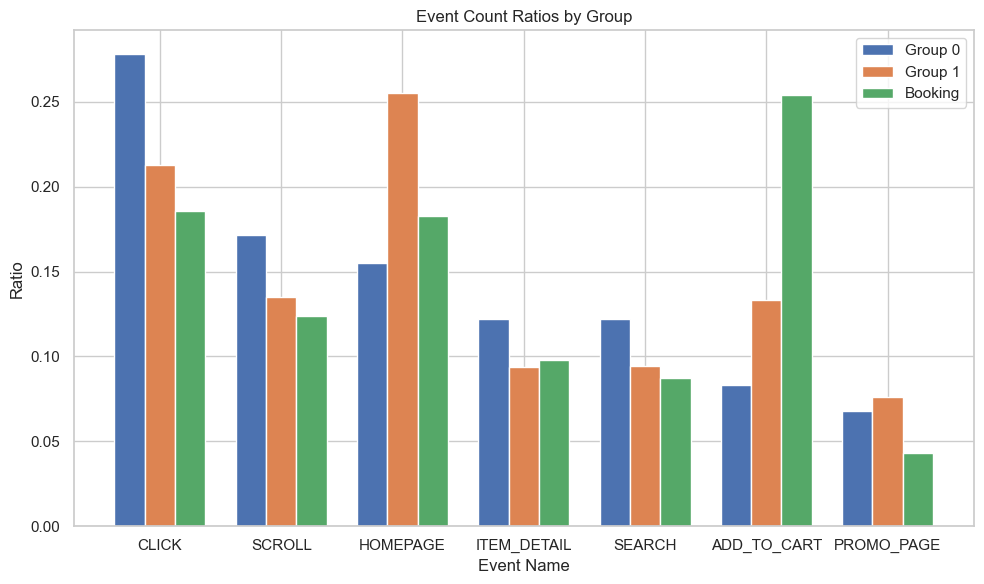

In [85]:
# 그래프 생성
plt.figure(figsize=(10, 6))

# 각 그룹에 대한 막대 그래프 생성
width = 0.25
ind = range(len(cl_cluster_count))
plt.bar(ind, cl_cluster_count['0_ratio'], width, label='Group 0')
plt.bar([i + width for i in ind], cl_cluster_count['1_ratio'], width, label='Group 1')
plt.bar([i + width*2 for i in ind], cl_cluster_count['ratio'], width, label='Booking')

plt.xlabel('Event Name')
plt.ylabel('Ratio')
plt.title('Event Count Ratios by Group')
plt.xticks([i + width for i in ind], cl_cluster_count['event_name'])
plt.legend()
plt.tight_layout()
plt.show()

클러스터 1과 ratio의 상관 계수: 0.6264886497030435


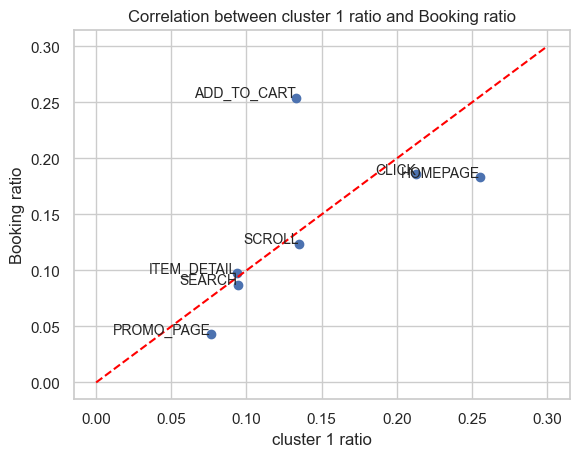

In [86]:
from scipy.stats import pearsonr

# 1_ratio와 ratio의 상관 계수 계산
correlation_1_ratio_ratio, _ = pearsonr(cl_cluster_count['1_ratio'], cl_cluster_count['ratio'])

# 상관 계수 출력
print("클러스터 1과 ratio의 상관 계수:", correlation_1_ratio_ratio)

# 상관 관계 시각화
plt.scatter(cl_cluster_count['1_ratio'], cl_cluster_count['ratio'])
plt.xlabel('cluster 1 ratio')
plt.ylabel('Booking ratio')
plt.title('Correlation between cluster 1 ratio and Booking ratio')
plt.plot([0, 0.3], [0, 0.3], color='red', linestyle='--', label='Best Line')
for i, label in enumerate(cl_cluster_count['event_name']):
    plt.text(cl_cluster_count['1_ratio'][i], cl_cluster_count['ratio'][i], label, fontsize=10, ha='right')
plt.show()

In [87]:
from scipy.stats import pearsonr

# pearsonr 검정
statistic, p_value = pearsonr(cl_cluster_count['ratio'], cl_cluster_count['1_ratio'])

# 유의수준 설정
alpha = 0.05

# p-value와 유의수준 비교
if p_value < alpha:
    result = "통계적으로 유의미함"
else:
    result = "통계적으로 무의미함"

print(f"p-value: {p_value}")
print(result)

p-value: 0.13221623328832532
통계적으로 무의미함


In [88]:
# ADD_TO_CART을 제외하고 검정
cl_cluster_count_ = cl_cluster_count[cl_cluster_count['event_name'] != 'ADD_TO_CART']

# pearsonr 검정
statistic, p_value = pearsonr(cl_cluster_count_['ratio'], cl_cluster_count_['1_ratio'])

# 유의수준 설정
alpha = 0.05

# p-value와 유의수준 비교
if p_value < alpha:
    result = "통계적으로 유의미함"
else:
    result = "통계적으로 무의미함"

print(f"p-value: {p_value}")
print(result)

p-value: 0.004325365903294728
통계적으로 유의미함


In [89]:
# "PROMO_PAGE" 이벤트가 발생한 세션을 필터링
promo_sessions = cl[cl['event_name'] == 'PROMO_PAGE']

# 각 세션의 전체 이벤트 횟수를 계산
event_counts = cl.groupby('session_id')['event_name'].count().reset_index()
event_counts.rename(columns={'event_name': 'total_events'}, inplace=True)

# "PROMO_PAGE" 이벤트의 발생 횟수를 계산
promo_event_counts = promo_sessions.groupby('session_id')['event_name'].count().reset_index()
promo_event_counts.rename(columns={'event_name': 'promo_events'}, inplace=True)

# 세션별로 전체 이벤트 횟수와 "PROMO_PAGE" 이벤트의 발생 횟수를 병합
session_promo_ratios = pd.merge(event_counts, promo_event_counts, on='session_id', how='left')

# "PROMO_PAGE" 이벤트 발생 횟수가 없는 경우 0으로
session_promo_ratios['promo_events'].fillna(0, inplace=True)

# "PROMO_PAGE" 이벤트 발생 횟수 대비 비율을 계산
session_promo_ratios['promo_event_ratio'] = session_promo_ratios['promo_events'] / session_promo_ratios['total_events']

In [90]:
session_promo_ratios

,session_id,total_events,promo_events,promo_event_ratio
0,00001f29-3ede-4445-95f0-0178934e32ba,8,0.0,0.000000
1,00003eca-954b-4150-aee1-63fc62f395cf,4,1.0,0.250000
2,0000425b-ddc8-4459-a240-6ba814dac132,4,1.0,0.250000
3,00005746-17ec-449c-9c5c-699a3ea9304a,66,1.0,0.015152
4,0000649b-9514-4600-979b-42166a798996,18,1.0,0.055556
...,...,...,...,...
895198,ffffce53-1ba7-4d7d-a14a-ffa7079cfbff,19,3.0,0.157895
895199,ffffd3d9-79db-459e-a427-388204a7aac7,19,0.0,0.000000
895200,ffffdf8e-dea1-42bc-9839-7662675c0d38,40,2.0,0.050000
895201,fffff7cf-2a18-4303-9c12-aa836ae3b543,15,0.0,0.000000


In [91]:
session_promo_ratios.promo_event_ratio.describe()

count    895203.000000
mean          0.039145
std           0.061978
min           0.000000
25%           0.000000
50%           0.000000
75%           0.068966
max           0.750000
Name: promo_event_ratio, dtype: float64

In [92]:
session_promo_ratios.promo_event_ratio.value_counts()

promo_event_ratio
0.000000    544124
0.125000     16657
0.111111     16616
0.100000     16438
0.142857     15826
             ...  
0.069364         1
0.057751         1
0.066406         1
0.113333         1
0.180723         1
Name: count, Length: 1191, dtype: int64

In [93]:
# "PROMO_PAGE" 이벤트가 발생한 세션의 수를 계산
promo_sessions = cl[cl['event_name'] == 'PROMO_PAGE']['session_id'].nunique()

# 전체 세션의 수를 계산
total_sessions = cl['session_id'].nunique()

# "PROMO_PAGE" 이벤트가 발생한 세션의 비율을 계산
promo_sessions / total_sessions

0.39217808698138856

# 계절과 구매

상품 계절 정보와 구매 시즌 비교

In [94]:
pro['id'] = pro['id'].astype(int)

In [95]:
proseason = pro[['id', 'season']]

In [96]:
traproduct = tra[['created_at', 'product_id']]

In [97]:
protra = pd.merge(proseason, traproduct, left_on='id', right_on='product_id')

In [98]:
protra

,id,season,created_at,product_id
0,15970,Fall,2019-07-04 09:43:04.691523+00:00,15970
1,15970,Fall,2021-10-18 02:42:44.802978+00:00,15970
2,15970,Fall,2020-07-06 01:05:31.917477+00:00,15970
3,15970,Fall,2021-07-19 19:08:21.678312+00:00,15970
4,15970,Fall,2022-05-25 04:44:49.224091+00:00,15970
...,...,...,...,...
1254580,51623,Winter,2022-01-04 13:40:28.429573+00:00,51623
1254581,51623,Winter,2020-03-05 10:09:03.345710+00:00,51623
1254582,51623,Winter,2021-09-29 13:12:32.617351+00:00,51623
1254583,51623,Winter,2022-05-24 13:17:29.582107+00:00,51623


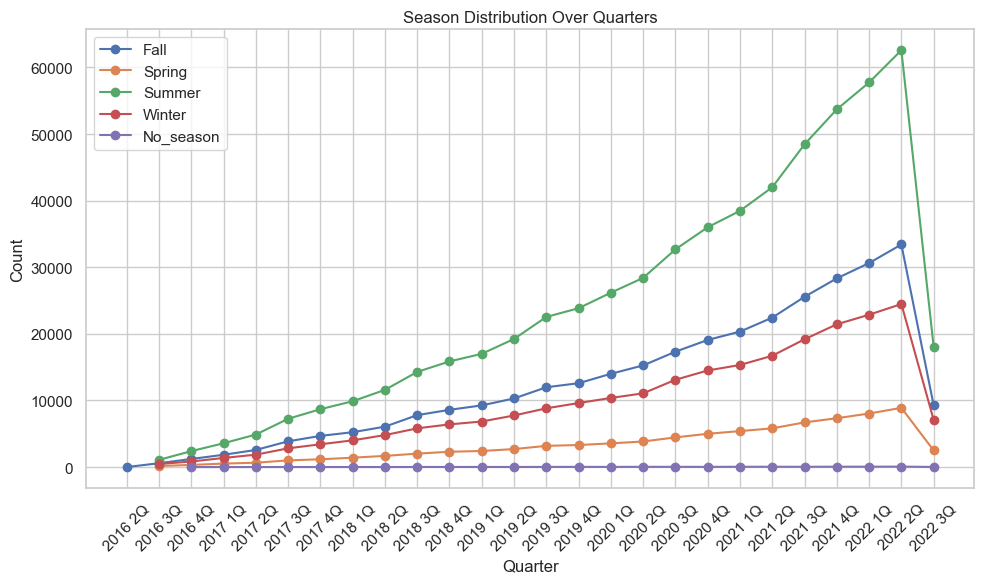

In [99]:
protra['created_at'] = pd.to_datetime(protra['created_at'])

# 3달 단위로 데이터를 묶어서 count
protra['quarter'] = protra['created_at'].apply(custom_quarters)
protra['season'] = protra['season'].replace('', 'No_season')
groupedprotra = protra.groupby(['quarter', 'season']).size().reset_index(name='count')

# 그래프 그리기
fig, ax = plt.subplots(figsize=(10, 6))
for season in groupedprotra['season'].unique():
    season_data = groupedprotra[groupedprotra['season'] == season]
    ax.plot(season_data['quarter'], season_data['count'], marker='o', label=season)

ax.set_xlabel('Quarter')
ax.set_ylabel('Count')
ax.set_title('Season Distribution Over Quarters')
ax.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

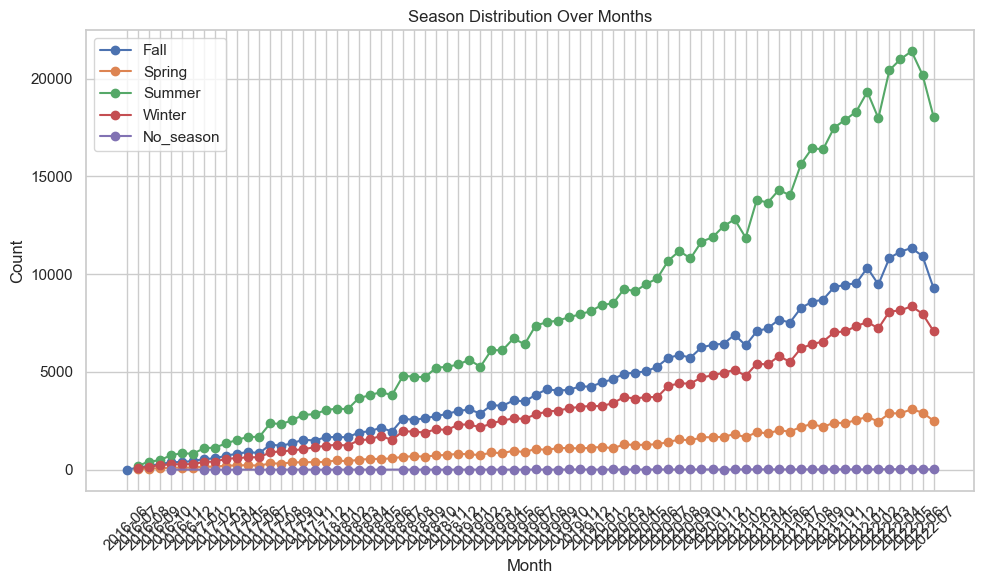

In [100]:
# 연도와 월 정보를 포함한 기간으로 변환
protra['month'] = protra['created_at'].dt.strftime('%Y-%m')
groupedprotram = protra.groupby(['month', 'season']).size().reset_index(name='count')

# 그래프 그리기
fig, ax = plt.subplots(figsize=(10, 6))
for season in groupedprotram['season'].unique():
    season_data = groupedprotram[groupedprotram['season'] == season]
    ax.plot(season_data['month'], season_data['count'], marker='o', label=season)

ax.set_xlabel('Month')
ax.set_ylabel('Count')
ax.set_title('Season Distribution Over Months')
ax.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [101]:
protra2017 = protra[protra['quarter'].str.contains('2017')]

C:\Users\MRHN\AppData\Local\Temp\ipykernel_8424\653987866.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  protra2017['season'] = protra2017['season'].replace('', 'No_season')


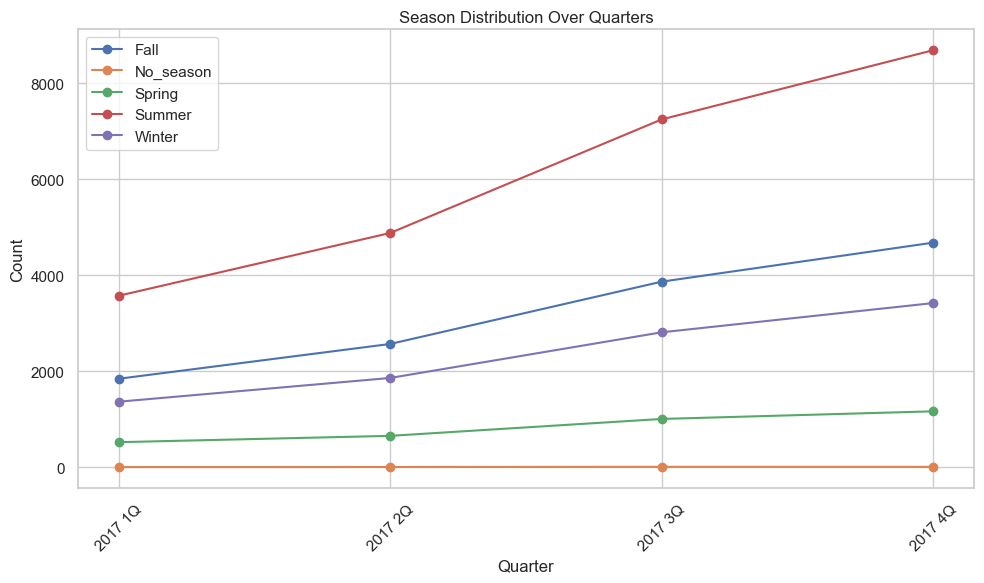

In [102]:
# 3달 단위로 데이터를 묶어서 count
protra2017['season'] = protra2017['season'].replace('', 'No_season')
groupedprotra2017 = protra2017.groupby(['quarter', 'season']).size().reset_index(name='count')

# 그래프 그리기
fig, ax = plt.subplots(figsize=(10, 6))
for season in groupedprotra2017['season'].unique():
    season_data = groupedprotra2017[groupedprotra2017['season'] == season]
    ax.plot(season_data['quarter'], season_data['count'], marker='o', label=season)

ax.set_xlabel('Quarter')
ax.set_ylabel('Count')
ax.set_title('Season Distribution Over Quarters')
ax.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

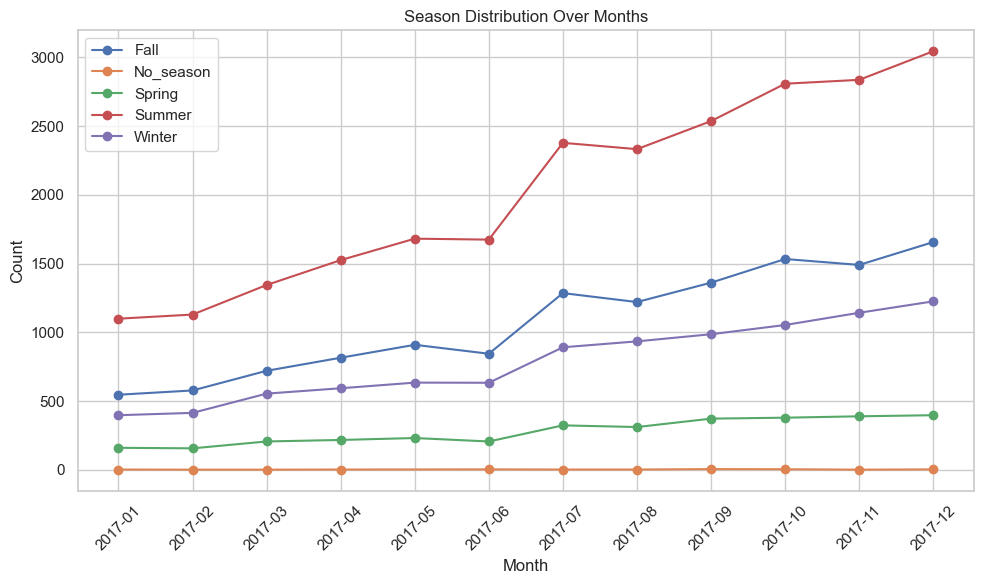

In [103]:
# 연도와 월 정보를 포함한 기간으로 변환
groupedprotram2017 = protra2017.groupby(['month', 'season']).size().reset_index(name='count')

# 그래프 그리기
fig, ax = plt.subplots(figsize=(10, 6))
for season in groupedprotram2017['season'].unique():
    season_data = groupedprotram2017[groupedprotram2017['season'] == season]
    ax.plot(season_data['month'], season_data['count'], marker='o', label=season)

ax.set_xlabel('Month')
ax.set_ylabel('Count')
ax.set_title('Season Distribution Over Months')
ax.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

상품 계절과 구매 장소 비교

In [104]:
#데이터프레임 정리
geotra = tra[['product_id', 'shipment_location_lat', 'shipment_location_long']]
geoseason = pd.merge(proseason, geotra, left_on='id', right_on='product_id')
geoseason.drop('product_id', axis=1, inplace = True)

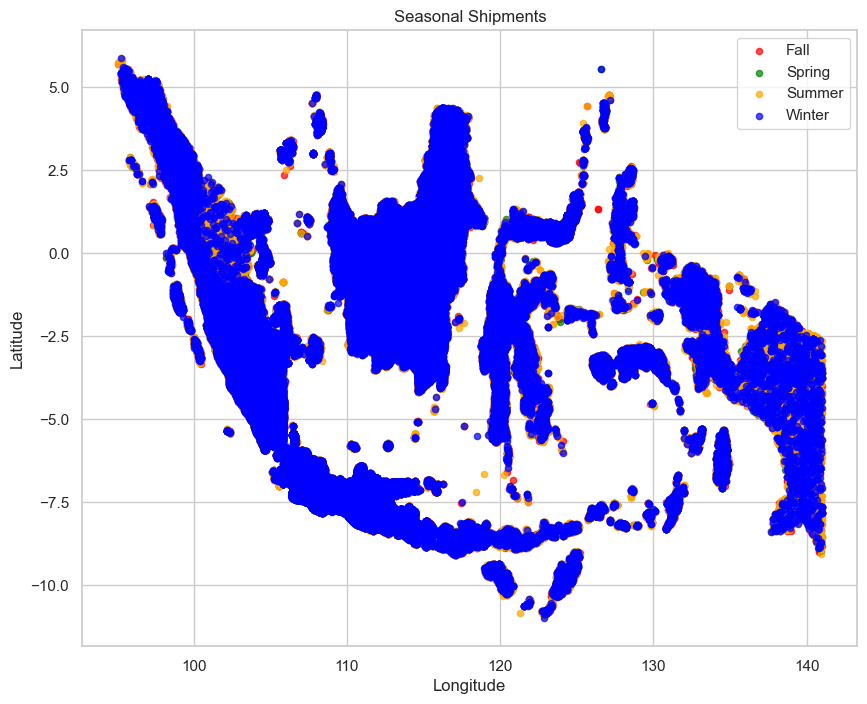

In [105]:
# 계절별 색 정의
season_colors = {'Fall': 'red', 'Winter': 'blue', 'Spring': 'green', 'Summer': 'orange'}

# GeoDataFrame 생성
geoseason_gdf = gpd.GeoDataFrame(geoseason, geometry=gpd.points_from_xy(geoseason['shipment_location_long'], geoseason['shipment_location_lat']))

# 각 시즌별 스캐터플랏 생성
fig, ax = plt.subplots(figsize=(10, 8))
for season, group in geoseason_gdf.groupby('season'):
    group.plot(ax=ax, kind='scatter', x='shipment_location_long', y='shipment_location_lat',
               color=season_colors.get(season, 'black'), label=season, alpha=0.7)

ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('Seasonal Shipments')
ax.legend()
ax.grid(True)
plt.show()

In [106]:
# 데이터프레임 정리
geotra_ = tra[['product_id', 'shipment_location_lat', 'shipment_location_long', 'quantity']]

# 열을 'quantity'만큼 반복
expanded_tra = geotra_.loc[geotra_.index.repeat(geotra_['quantity'])].reset_index(drop=True)


# 확장된 데이터프레임 인덱스 리셋
expanded_tra.reset_index(drop=True, inplace=True)

# 데이터프레임 최종 정리
expanded_geoseason = pd.merge(proseason, expanded_tra, left_on='id', right_on='product_id')

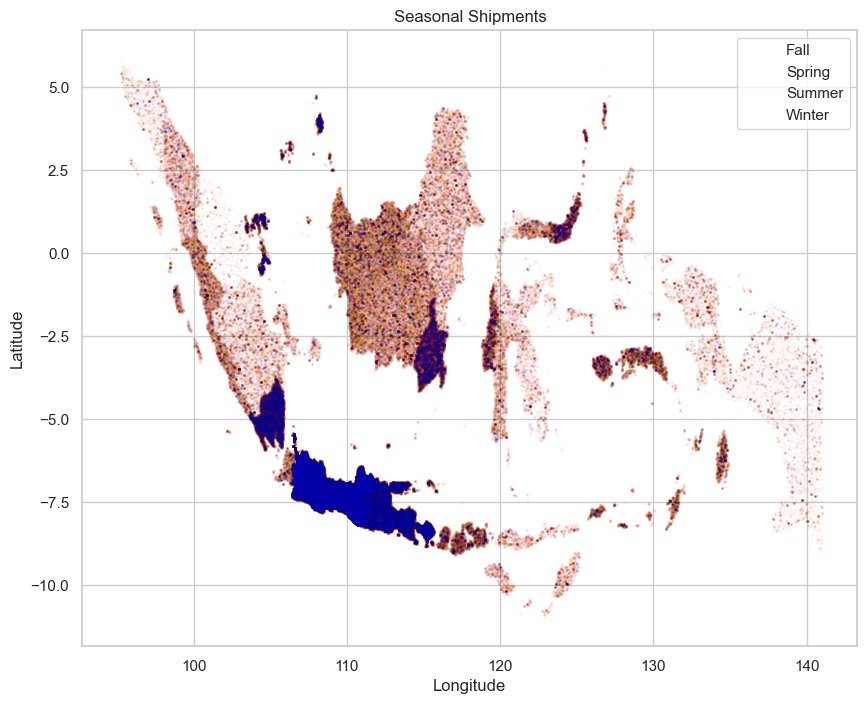

In [107]:
# GeoDataFrame 생성
expanded_geoseason_gdf = gpd.GeoDataFrame(expanded_geoseason,
                                           geometry=gpd.points_from_xy(expanded_geoseason['shipment_location_long'],
                                                                       expanded_geoseason['shipment_location_lat']))

# 각 시즌별 스캐터플랏 생성
fig, ax = plt.subplots(figsize=(10, 8))
for season, group in expanded_geoseason_gdf.groupby('season'):
    group.plot(ax=ax, kind='scatter', x='shipment_location_long', y='shipment_location_lat',
               color=season_colors.get(season, 'black'), label=season, alpha=0.01, s=1)

ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('Seasonal Shipments')
ax.legend()
ax.grid(True)
plt.show()

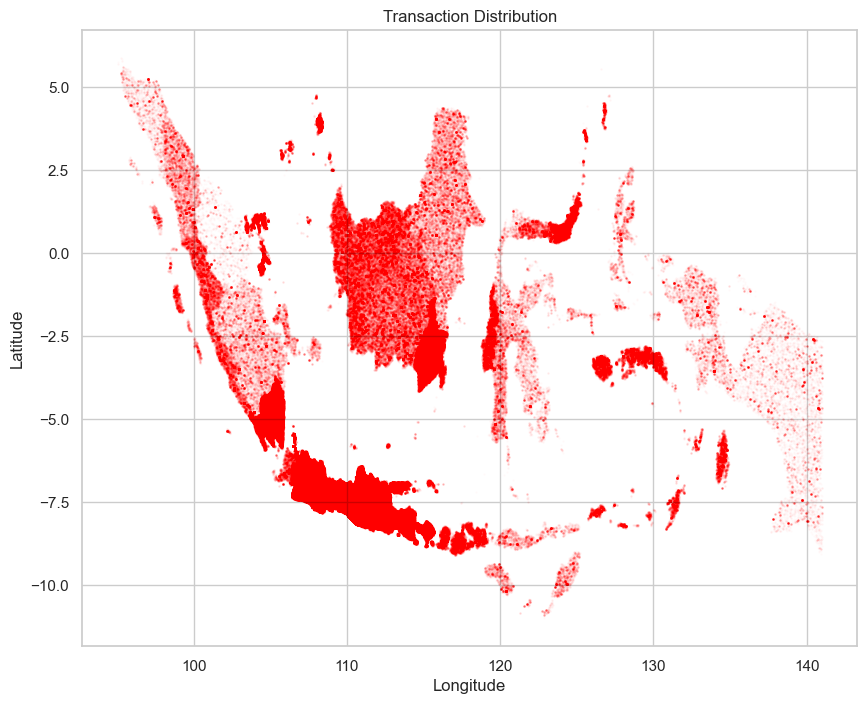

In [108]:
# GeoDataFrame 생성
expanded_geoseason_gdf = gpd.GeoDataFrame(expanded_geoseason,
                                           geometry=gpd.points_from_xy(expanded_geoseason['shipment_location_long'],
                                                                       expanded_geoseason['shipment_location_lat']))

# 각 시즌별 스캐터플랏 생성
fig, ax = plt.subplots(figsize=(10, 8))
for season, group in expanded_geoseason_gdf.groupby('season'):
    group.plot(ax=ax, kind='scatter', x='shipment_location_long', y='shipment_location_lat',
               color='red', alpha=0.01, s=1)

ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('Transaction Distribution')
ax.grid(True)
plt.show()

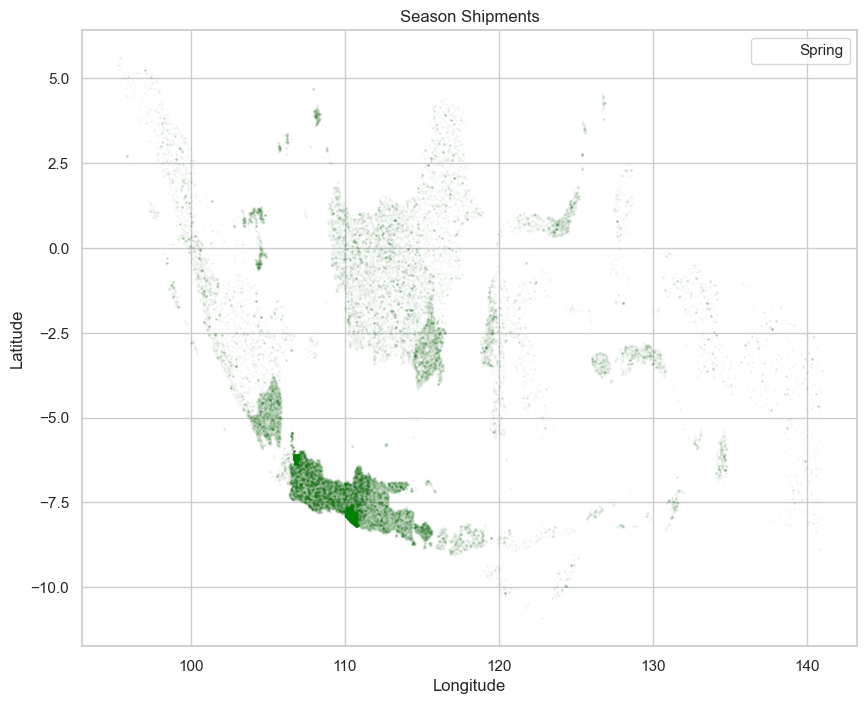

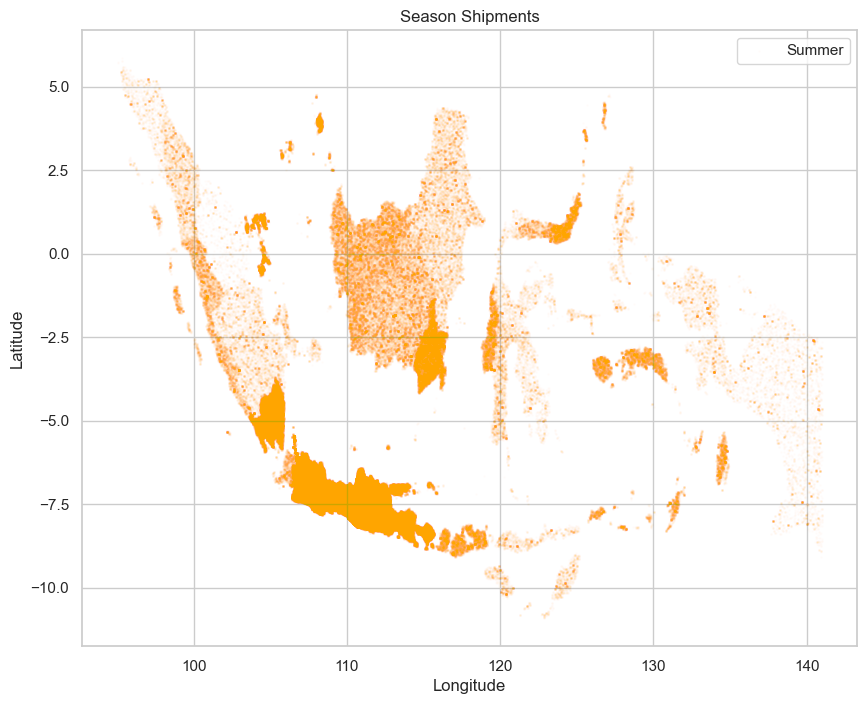

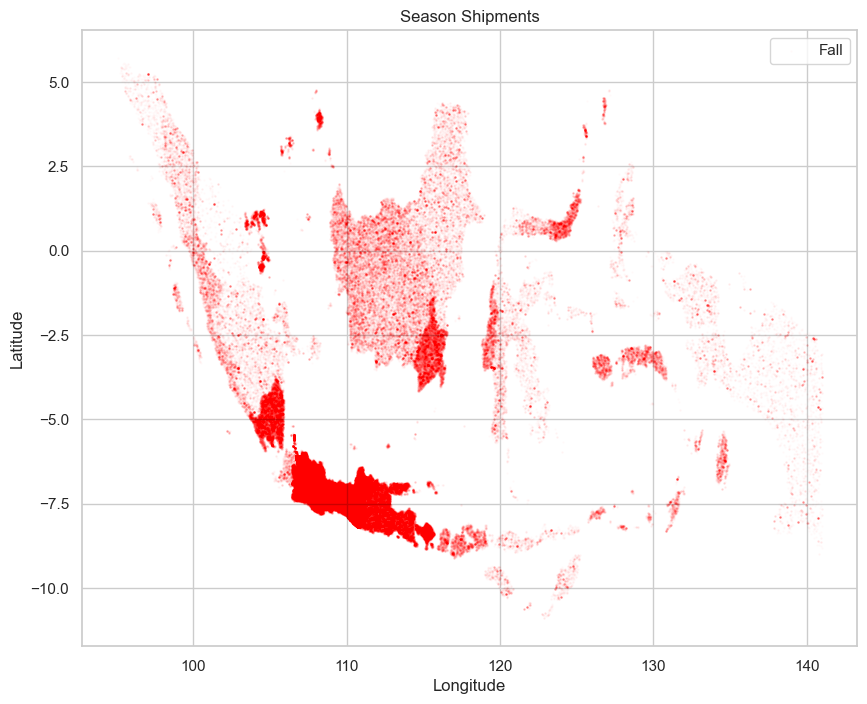

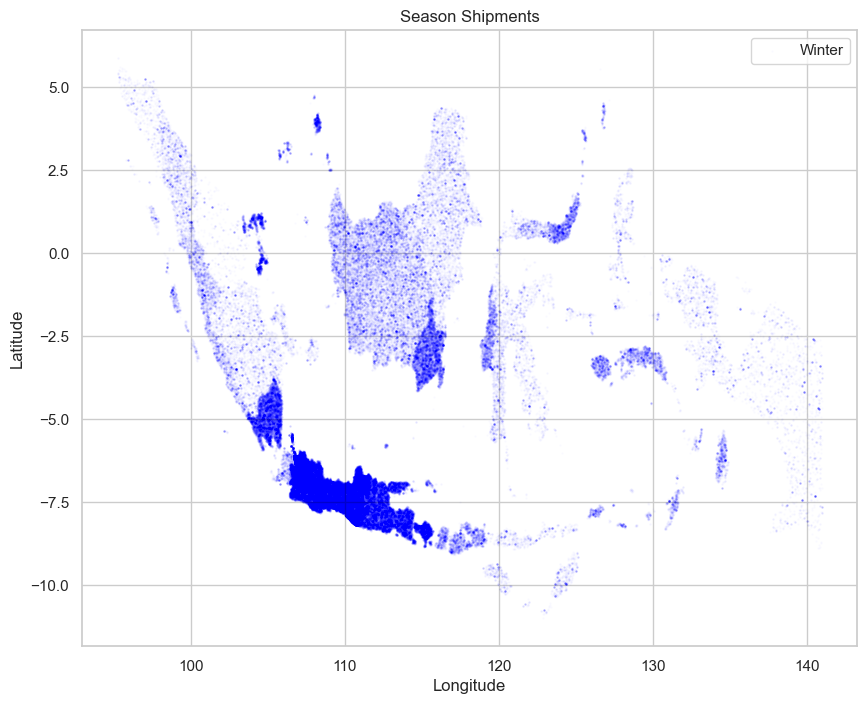

In [109]:
# GeoDataFrame 생성(봄)
expanded_geoseason_gdf = gpd.GeoDataFrame(expanded_geoseason,
                                           geometry=gpd.points_from_xy(expanded_geoseason['shipment_location_long'],
                                                                       expanded_geoseason['shipment_location_lat']))

# 계절 필터링
season_data = expanded_geoseason_gdf[expanded_geoseason_gdf['season'] == 'Spring']

# 스캐터플랏 생성
fig, ax = plt.subplots(figsize=(10, 8))
season_data.plot(ax=ax, kind='scatter', x='shipment_location_long', y='shipment_location_lat',
                 color=season_colors.get('Spring', 'black'), label='Spring', alpha=0.01, s=1)

ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('Season Shipments')
ax.legend()
ax.grid(True)
plt.show()

# GeoDataFrame 생성(여름)
expanded_geoseason_gdf = gpd.GeoDataFrame(expanded_geoseason,
                                           geometry=gpd.points_from_xy(expanded_geoseason['shipment_location_long'],
                                                                       expanded_geoseason['shipment_location_lat']))

# 계절 필터링
season_data = expanded_geoseason_gdf[expanded_geoseason_gdf['season'] == 'Summer']

# 스캐터플랏 생성
fig, ax = plt.subplots(figsize=(10, 8))
season_data.plot(ax=ax, kind='scatter', x='shipment_location_long', y='shipment_location_lat',
                 color=season_colors.get('Summer', 'black'), label='Summer', alpha=0.01, s=1)

ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('Season Shipments')
ax.legend()
ax.grid(True)
plt.show()

# GeoDataFrame 생성(가을)
expanded_geoseason_gdf = gpd.GeoDataFrame(expanded_geoseason,
                                           geometry=gpd.points_from_xy(expanded_geoseason['shipment_location_long'],
                                                                       expanded_geoseason['shipment_location_lat']))

# 계절 필터링
season_data = expanded_geoseason_gdf[expanded_geoseason_gdf['season'] == 'Fall']

# 스캐터플랏 생성
fig, ax = plt.subplots(figsize=(10, 8))
season_data.plot(ax=ax, kind='scatter', x='shipment_location_long', y='shipment_location_lat',
                 color=season_colors.get('Fall', 'black'), label='Fall', alpha=0.01, s=1)

ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('Season Shipments')
ax.legend()
ax.grid(True)
plt.show()

# GeoDataFrame 생성(겨울)
expanded_geoseason_gdf = gpd.GeoDataFrame(expanded_geoseason,
                                           geometry=gpd.points_from_xy(expanded_geoseason['shipment_location_long'],
                                                                       expanded_geoseason['shipment_location_lat']))

# 계절 필터링
season_data = expanded_geoseason_gdf[expanded_geoseason_gdf['season'] == 'Winter']

# 스캐터플랏 생성
fig, ax = plt.subplots(figsize=(10, 8))
season_data.plot(ax=ax, kind='scatter', x='shipment_location_long', y='shipment_location_lat',
                 color=season_colors.get('Winter', 'black'), label='Winter', alpha=0.01, s=1)

ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('Season Shipments')
ax.legend()
ax.grid(True)
plt.show()


# 분기별 비교

In [110]:
pro_quater = protra[['quarter']].value_counts().reset_index().sort_values(by='count', ascending=True)
pro_quater['Growth Rate'] = pro_quater['count'].pct_change()
thr_tra = Thr_mon_ratio.merge(pro_quater, on='quarter', how='inner')
thr_tra = thr_tra[thr_tra['quarter'] != '2016 3Q']

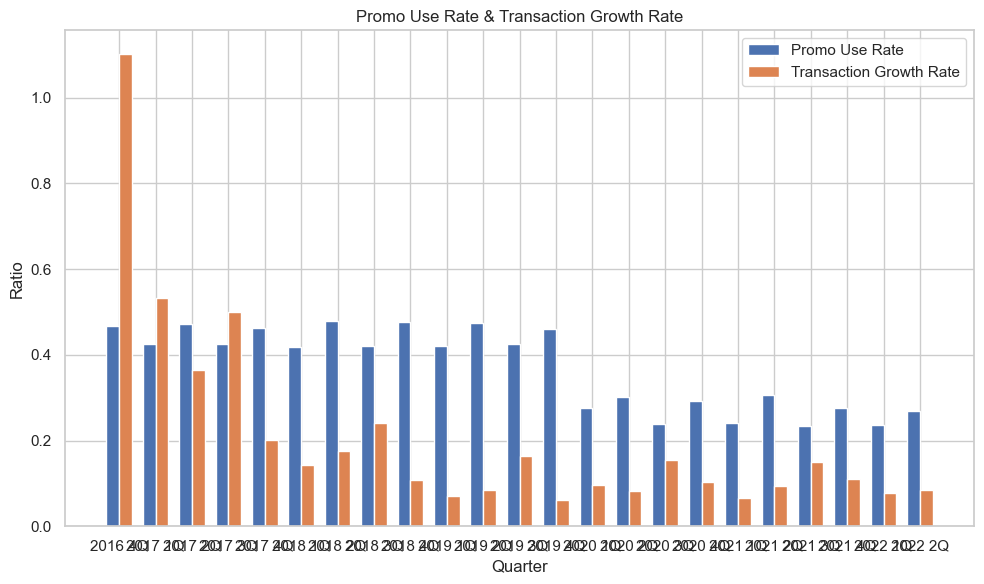

In [111]:
# 그래프 생성
plt.figure(figsize=(10, 6))

# 각 그룹에 대한 막대 그래프 생성
width = 0.35
ind = range(len(thr_tra))
plt.bar(ind, thr_tra[1], width, label='Promo Use Rate')
plt.bar([i + width for i in ind], thr_tra['Growth Rate'], width, label='Transaction Growth Rate')

plt.xlabel('Quarter')
plt.ylabel('Ratio')
plt.title('Promo Use Rate & Transaction Growth Rate')
plt.xticks([i + width/2 for i in ind], thr_tra['quarter'])
plt.legend()
plt.tight_layout()

# 그래프 표시
plt.show()